<div class="alert alert-info" align=center>
<font size="5", color = "black"><b>Выпускной проект курса "Специалист Data Scientist" по предметной области: <br><br>Телекоммуникации.</b></font>
    </div>

## Оглавление (если не используется  NBExtensions / Table of Contents )

In [42]:
#будет работать только если Markdowт процессор оставляет неизменным регистр в автоматически формируемых якорях 
#(иногда якоря автоматически приводятся к нижнему регистру)
#если ссылки не будут работать, попробуй поставь ниже 1 вместо 0 и перезапусти ячейку
MakdownLowStyleAnchor = 0

In [43]:
import nbformat
import re
from IPython.display import display, Markdown


def slugify(value, MarkdownLowStyleAnchor=0):
    """
    Нормализует строку, удаляя все нежелательные символы и преобразуя пробелы и дефисы в одиночные дефисы. Приведение к нижнему регистру производится только если указано параметром MarkdownLowStyleAnchor.

    :param value: Строка, которую нужно нормализовать.
    :type value: str
    :param MarkdownLowStyleAnchor: Флаг, указывающий на необходимость преобразования строки к нижнему регистру (1 - преобразовывать, 0 - не преобразовывать).
    :type MarkdownLowStyleAnchor: int, optional
    :return: Нормализованная строка, готовая для использования в URL или ID.
    :rtype: str

    Примеры:

    >>> slugify("Hello, World!  This is a test.", MarkdownLowStyleAnchor=1)
    'hello-world-this-is-a-test'
    >>> slugify("Hello, World!  This is a test.")
    'Hello-World-This-is-a-test'
    """
    if MarkdownLowStyleAnchor == 1:
        value = value.lower()
    
    value = re.sub('[^\w\s-]', '', value)  # Удаляем все специальные символы, кроме букв, цифр, пробелов и дефисов
    value = re.sub('[-\s]+', '-', value).strip('-')  # Замена всех последовательностей пробелов и дефисов на один дефис

    return value



def generate_toc(notebook_path):
    """
    Генерирует оглавление для Jupyter Notebook, расположенного по указанному пути.

    :param notebook_path: Путь к файлу Jupyter Notebook.
    :type notebook_path: str
    :return: Оглавление в формате Markdown.
    :rtype: str

    Пример использования:

    >>> toc = generate_toc('path_to_your_notebook.ipynb')
    >>> print(toc)
    '1 [Introduction](#introduction)\n2 [Usage](#usage)'
    """
    with open(notebook_path, 'r', encoding='utf-8') as f:
        nb = nbformat.read(f, as_version=4)

    header_count = [0] * 10  # Поддержка до 10 уровней вложенности
    last_level = 0
    toc = []

    for cell in nb.cells:
        if cell.cell_type == 'markdown':
            lines = cell.source.split('\n')
            for line in lines:
                match = re.match(r'^(#{1,10}) (.*)', line)
                if match:
                    level = len(match.group(1))
                    title = match.group(2).strip()

                    # Обновление уровней заголовков
                    if level == last_level:
                        header_count[level - 1] += 1  # Тот же уровень, увеличиваем последний элемент
                    elif level > last_level:
                        header_count[level - 1] = 1  # Новый подуровень, инициализируем 1
                    else:
                        header_count[level - 1] += 1  # Поднятие уровня
                        for i in range(level, last_level):
                            header_count[i] = 0  # Обнуляем все следующие уровни

                    last_level = level

                    # Создание строки номеров заголовка
                    num_str = '.'.join(str(x) for x in header_count[:level] if x > 0)
                    anchor = slugify(title)
                    toc.append(f"{num_str} [{title}](#{anchor}) <br>")

    return '\n'.join(toc)

# Вызываем автосборку оглавления
notebook_path = 'c:\\Users\\LocalAdmin\\GitDesktop\\AndreyBWhite\\Telecom\\TelecomLostClients.ipynb' 
toc_text = generate_toc(notebook_path)
display(Markdown(toc_text))

1 [Оглавление (если не используется  NBExtensions / Table of Contents )](#Оглавление-если-не-используется-NBExtensions-Table-of-Contents) <br>
2 [План проекта](#План-проекта) <br>
2.1 [Постановка задачи](#Постановка-задачи) <br>
2.2 [Планирование выполнения](#Планирование-выполнения) <br>
2.3 [Важное примечание](#Важное-примечание) <br>
3 [Предобработка](#Предобработка) <br>
3.1 [Подключение модулей и библиотек](#Подключение-модулей-и-библиотек) <br>
3.2 [Загрузка и общее закомство с данными](#Загрузка-и-общее-закомство-с-данными) <br>
3.2.1 [Загрузка](#Загрузка) <br>
3.2.2 [Соотношение между предоставленными выгрузками](#Соотношение-между-предоставленными-выгрузками) <br>
3.2.3 [Данные personal_new.csv — персональные данные клиента](#Данные-personal_newcsv-персональные-данные-клиента) <br>
3.2.4 [Данные contract_new.csv — информация о договоре](#Данные-contract_newcsv-информация-о-договоре) <br>
3.2.5 [Данные internet_new.csv — информация о подключенных услугах интернета](#Данные-internet_newcsv-информация-о-подключенных-услугах-интернета) <br>
3.2.6 [Данные phone_new.csv — информация  о подключенных услугах телефонии](#Данные-phone_newcsv-информация-о-подключенных-услугах-телефонии) <br>
3.2.7 [Выводы по предоставленным данным](#Выводы-по-предоставленным-данным) <br>
4 [Объединение  и исследовательский анализ данных](#Объединение-и-исследовательский-анализ-данных) <br>
4.1 [Объединение данных](#Объединение-данных) <br>
4.2 [Выбросы](#Выбросы) <br>
4.3 [Обогащение данных](#Обогащение-данных) <br>
4.4 [Общее представление об типах оказываемых услуг](#Общее-представление-об-типах-оказываемых-услуг) <br>
4.5 [Услуги интернета](#Услуги-интернета) <br>
4.6 [Некоторые экономические изыскания](#Некоторые-экономические-изыскания) <br>
4.7 [Взаимосвязи между признаками](#Взаимосвязи-между-признаками) <br>
4.8 [Анализ особенностей распределений признаков для потерянных клиентов](#Анализ-особенностей-распределений-признаков-для-потерянных-клиентов) <br>
4.8.1 [Распределение длительности контракта среди потерянных и оставшихся клиентов](#Распределение-длительности-контракта-среди-потерянных-и-оставшихся-клиентов) <br>
4.8.2 [Поиск причин потери клиентов среди набора предоставлемых услуг](#Поиск-причин-потери-клиентов-среди-набора-предоставлемых-услуг) <br>
4.8.3 [Связь между ежемесячным чеком и потерей клиента](#Связь-между-ежемесячным-чеком-и-потерей-клиента) <br>
4.8.4 [Связь между потерей клиента и периодичностью оплаты](#Связь-между-потерей-клиента-и-периодичностью-оплаты) <br>
4.8.5 [Связь между потерей клиента и остальными признаками](#Связь-между-потерей-клиента-и-остальными-признаками) <br>
4.8.6 [Вывод по профилю потерянного клиента](#Вывод-по-профилю-потерянного-клиента) <br>
4.9 [Выводы по анализу данных](#Выводы-по-анализу-данных) <br>
5 [Подготовка данных](#Подготовка-данных) <br>
5.1 [Удаление лишних признаков](#Удаление-лишних-признаков) <br>
5.2 [Устранение неопределенных значений](#Устранение-неопределенных-значений) <br>
5.3 [Финальная проверка на дубликаты](#Финальная-проверка-на-дубликаты) <br>
5.4 [Разбиение](#Разбиение) <br>
6 [Обучение и выбор модели](#Обучение-и-выбор-модели) <br>
6.1 [Модель логистической регрессии, LogisticRegression, GridSearchCV](#Модель-логистической-регрессии-LogisticRegression-GridSearchCV) <br>
6.2 [Модель классификатора методом опорных векторов - SVM, Support Vector Machine](#Модель-классификатора-методом-опорных-векторов-SVM-Support-Vector-Machine) <br>
6.2.1 [SVM, Support Vector Machine, GridSearchCV](#SVM-Support-Vector-Machine-GridSearchCV) <br>
6.2.2 [SVM, Support Vector Machine, Optuna](#SVM-Support-Vector-Machine-Optuna) <br>
6.3 [Модель классификатора на основе дерева решений, DecisionTreeClassifier](#Модель-классификатора-на-основе-дерева-решений-DecisionTreeClassifier) <br>
6.3.1 [DecisionTreeClassifier, Optuna](#DecisionTreeClassifier-Optuna) <br>
6.3.2 [DecisionTreeClassifier, RandomizedSearchCV](#DecisionTreeClassifier-RandomizedSearchCV) <br>
6.4 [Модель классификатора на базе случайного леса, RandomForestClassifier, Optuna](#Модель-классификатора-на-базе-случайного-леса-RandomForestClassifier-Optuna) <br>
6.5 [Модель градиентного бустинга, XGBClassifier, Optuna](#Модель-градиентного-бустинга-XGBClassifier-Optuna) <br>
6.6 [Модель градиентного бустинга, CatBoostClassifier, Optuna](#Модель-градиентного-бустинга-CatBoostClassifier-Optuna) <br>
6.7 [Выбор модели](#Выбор-модели) <br>
7 [Тестированиие выбранной модели](#Тестированиие-выбранной-модели) <br>
7.1 [CatBoostClassifier](#CatBoostClassifier) <br>
8 [Вывод и рекомендации заказчику](#Вывод-и-рекомендации-заказчику) <br>
8.1 [Общий вывод](#Общий-вывод) <br>
8.2 [Примечание по предоставленным данным](#Примечание-по-предоставленным-данным) <br>
8.3 [Найденные зависимости в данных](#Найденные-зависимости-в-данных) <br>
8.3.1 [Общие характеристики](#Общие-характеристики) <br>
8.3.2 [Выявленные харакетиристики для потерянных клиентов](#Выявленные-харакетиристики-для-потерянных-клиентов) <br>
8.4 [Предложения по улучшению](#Предложения-по-улучшению) <br>
8.4.1 [В части применения модели](#В-части-применения-модели) <br>
8.4.2 [В части работы с пользователями и услуг](#В-части-работы-с-пользователями-и-услуг) <br>
9 [Архив](#Архив) <br>
9.1 [RandomForestClassifier](#RandomForestClassifier) <br>
9.2 [XGBClassifier](#XGBClassifier) <br>
9.3 [DecisionTreeClassifier](#DecisionTreeClassifier) <br>
9.4 [Support Vector Machine - дополнительная попытка минимизации ошибки второго рода](#Support-Vector-Machine-дополнительная-попытка-минимизации-ошибки-второго-рода) <br>

## План проекта

### Постановка задачи

Описание проекта: телекоммуникации
<br><br>
Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах. <b>Ваша задача — обучить на этих данных модель для прогноза оттока клиентов.</b>


### Планирование выполнения

В рамках выполнения описанной выше Задачи, выполним следующие шаги:
- Подготовим среду выполнения - загрузим все необходимые модули и библиотеки. В случае необходимости, инсталлируем их.
- Проведем первоначальное знакомство с предоставленными данными -  выполним их загрузку и первичный осмотр.
- Проведем объединение данных в едином датафрейме, подходящем для комплексного анализа и дальнейшего выполнения задачи. Выполним анализ обощенных данных. Отдельно изучим распределения признаков для потерянных клиентов в целях поиска факторов ухода.
- Подготовим копию данных, сформированную по результатам анализа, для использования в моделях.
- Проведем обучение моделей и выбор лучшей из них
- Проверим модель на тестовых данных 
- Передадим модель Заказчику, снабдив общиим выводом и рекомендациями


### Важное примечание

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий автора</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Добрый день!
        
<br><br>
Перед тем, как ты приступишь к чтению проекта, хотелось бы акценировать твое внимание на некоторых деталях.
<ul>
<li>Чтобы не утомлять тебя многочисленным повторением одних и тех же операций, в работе приведен последовательный порядок выполнения. В реальности, последовательность была итеративная: анализ данных -> обучение моделей -> выяснение что часть из них не дотягивает до целевых метрик а часть не успевает на GridSearchCV -> перевод  их на RandomizeSearchCV и опять долго - > перевод на Optuna -> расширение списка моделей -> расширение параметров -> дополнительный анализ изначальных признаков -> повторный запуск моделей на Optuna -> получение метрик. Понимание этого факта упростит понимание кода - без этого он может казаться немного не последовательным.
<li>Поскольку большинство моделей требуют значительного времени обучения (были те, которые обучались более 4* часов), то  участки кода с обучением моделей приведены в виде результатов, а соответствущие запуски обучения зависят от переменной задаваемой в начале каждого раздела 6.1-6.6. Переменные вида: ХХХ_yesnoswitch = 1, где 'ХХХ' - сокращение от названия модели, например 'SVM' или 'LR' приведут к запуску этого блока при инициализации 1(True) и пропуском если заданы 0(False).
<li>В модели SVM, оставлен только запуск через Optuna, так как результаты получаются сравнимые с GridSearchCV, но на последнем обучение модели занимает около 1,5* часов
<li>Выключено обучение LogisticRegression (10-17* минут) и RandomForestClassifier (~35* минут). Результаты их обучения сохранены в виде текстовых блоков и участвуют в логике повествования.
<li>Модели DecisionTreeClassifier выключены.
<li>Включено только CatBoost, она является лучшей.
           
<br><br>С уважением, и надеждой на понимание, Андрей.
       
 <br>________
 <br>(*) все время исполнения указано для случая запуска тетрадки на предоставленных серверах
        


## Предобработка

### Подключение модулей и библиотек

In [35]:
#phik - для выявления зависимостей между параметрами
#!pip install phik
#для диаграм
!pip install matplotlib-venn
!pip install upsetplot
!pip install phik
#для поиска гиперпараметров
!pip install optuna


In [36]:
import pandas as pd

#для работы с файлами
import os

#отдельные операции
import numpy as np

#для работы с датой
from datetime import datetime
from pandas.tseries.offsets import DateOffset

#для графиков
import matplotlib.pyplot as plt
import seaborn as sns

#для диаграмм Эйлера
from matplotlib_venn import venn2
from matplotlib.patches import Patch

#UpSet - для анализа пересечений множеств применительно к продуктовому портфелю
from upsetplot import UpSet

#импортируем библиотеку phik  - для аналлиза корреляций
import phik
# импортируем функции для построения матрицы
from phik import phik_matrix
from phik.report import plot_correlation_matrix

#для работы с предупредениями в процессе обучения моделей
import warnings

# используемые модели
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# для ращбиения и подготовки данных
from sklearn.model_selection import train_test_split
# загружаем классы для преобразования данных
from sklearn.preprocessing import (
    LabelEncoder,
    OneHotEncoder,
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler,
    RobustScaler
)

# пайплайны
from sklearn.pipeline import Pipeline
# класс ColumnTransformer помогает работать с данными разного типа в одном наборе
from sklearn.compose import ColumnTransformer

# загружаем нужные метрики для ROC AUC и accuracy
from sklearn.metrics import (
    accuracy_score, 
    roc_auc_score, 
    confusion_matrix, 
    roc_curve, 
    auc, 
    make_scorer, 
    recall_score
)

# загружаем инструменты для подбора гиперпараметров
import optuna
from sklearn.model_selection import (cross_val_score, GridSearchCV, RandomizedSearchCV)
#случайный подбор параметров
from scipy.stats import randint


#глобальные константы
RANDOM_STATE = 40324
TEST_SIZE = 0.25
DATA_PATH = "/datasets/"

### Загрузка и общее закомство с данными

#### Загрузка

In [37]:
#- contract_new.csv — информация о договоре;
#- personal_new.csv — персональные данные клиента;
#- internet_new.csv — информация об интернет-услугах;
#- phone_new.csv — информация об услугах телефонии.

if os.path.exists(DATA_PATH + "contract_new.csv"):
    contract = pd.read_csv(DATA_PATH + "contract_new.csv")
    contract.info()
else:
    print('Something is wrong')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [38]:
if os.path.exists(DATA_PATH + "personal_new.csv"):
    personal = pd.read_csv(DATA_PATH + "personal_new.csv")
    personal.info()
else:
    print('Something is wrong')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [39]:
if os.path.exists(DATA_PATH + "internet_new.csv"):
    internet = pd.read_csv(DATA_PATH + "internet_new.csv")
    internet.info()
else:
    print('Something is wrong')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [40]:
if os.path.exists(DATA_PATH + "phone_new.csv"):
    phone = pd.read_csv(DATA_PATH + "phone_new.csv")
    phone.info()
else:
    print('Something is wrong')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


#### Соотношение между предоставленными выгрузками

У нас в выборке 7043 клиента с договорами, с которыми активно 5517 услуг интернета и 6361 услуг телефонии. Опираясь на количество записей можно с уверенностью утверждать, что есть клиенты у которых подклчены и услуги телефонии и интернета. Проверим.

In [41]:
# идентификаторы клиентов, которые отсутствуют в обоих датафреймах 'internet' и 'phone'
common_customerIDs = personal[personal['customerID'].isin(internet['customerID']) 
                              & personal['customerID'].isin(phone['customerID'])]['customerID']
print ("Клиентов с подключенными телефонией и интернетом: ", common_customerIDs.count())

Клиентов с подключенными телефонией и интернетом:  4835


Чудесным образом 6361 + 5517 - 7043 тоже равно 4835. Т.е. выглядит как будто клиент либо имеет одну услугу либо две, но пока это не точно. <br><br>Проверим, что с клиентами без каких либо подключенных услуг?

In [42]:
# идентификаторы клиентов, которые отсутствуют в обоих датафреймах 'internet' и 'phone'
not_in_internet_or_phone = personal[~personal['customerID'].isin(internet['customerID']) 
                                    & ~personal['customerID'].isin(phone['customerID'])]['customerID']
print ("Клиентов у которых нет информации об услугах телефонии или интернета: ", not_in_internet_or_phone.count())

Клиентов у которых нет информации об услугах телефонии или интернета:  0


Наша гипотеза подтвердилась. У нас всегда есть запись об услуге для клиента, даже если он уже не пользуется услугами компании и эта запись либо одна либо их две (по каждому из двух видов услуг), других вариантов нет.<br>Это упрощает задачу потому что как в реальности, конечно, у одного клиента могло быть много разных услуг одного типа изменяемых с теченеим времени (например переход с одного на другой тариф интернета).

#### Данные personal_new.csv — персональные данные клиента

In [43]:
print (personal.head())
print ("Количество дубликатов: ", personal.duplicated().sum())

   customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No
Количество дубликатов:  0


Из предоставленных данных знаем, что: <br>
    <pre>
customerID — идентификатор пользователя;
gender — пол;
SeniorCitizen — является ли абонент пенсионером;
Partner — есть ли у абонента супруг или супруга;
Dependents — есть ли у абонента дети.
    </pre>

Четыре категориальных признака с бинарными значениями, правда заданными немного по разному. Булевы значения для Partner и Dependents и 0/1 для SeniorCitizen.<br><b>Стоп!</b><br>В современном мире может быть подвох.  Посмотрим, добралось ли сюда гендерное многообразие и заодно проверим насчет бинарности пенсионеров.

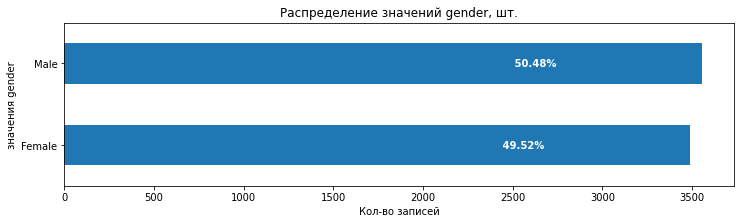

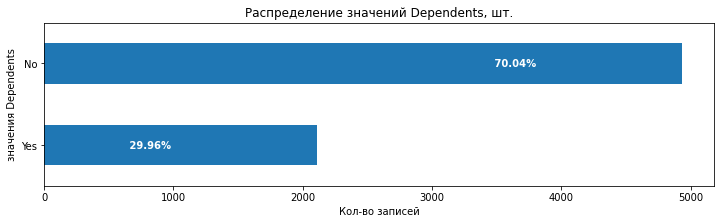

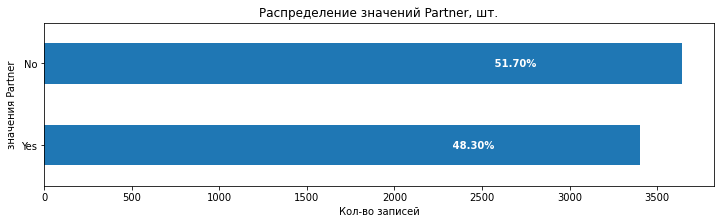

count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64
Всего  2  уникальных значений


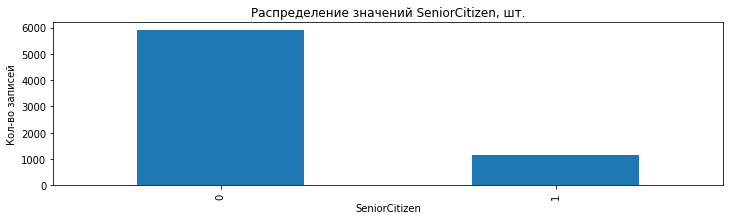

In [44]:
############
# функция беглого исследования данных в датафрейме
# для категориальных данных строит стобчатую диаграмму
# для числовых выводит описание describe и отрисовывает распределения plot
# nocols - параметры (столбцы) датафрейма, которые будут пропущены при анализе
###########
def dataframe_research (data, nocols=[]):
    #категориальные признаки - заданны в строках
    data_cat_col_names = data.select_dtypes(include='object').columns.tolist()
    for catname in (set(data_cat_col_names)-set(nocols)):
        
        group_size = data.groupby(catname).size().sort_values(ascending=True)
        total = group_size.sum()
        percentages = group_size / total * 100
        
        #print (group_size)
        group_size.plot(kind='barh', title='Распределение значений '+ catname +', шт.', figsize=(12,3))
        plt.xlabel('Кол-во записей')
        plt.ylabel('значения ' + catname)
        #добавление подписей в процентах
        for index, value in enumerate(group_size):
            #вычисляем позицию для текста и отступаем влево на небольшое значение от конца столбика.
            text_position = value - max(group_size) * 0.3  
            plt.text(text_position, index, f' {percentages[index]:.2f}%', 
                     verticalalignment='center', color='white', weight='bold')            
        plt.show()            
         
    #числовые признаки
    data_num_col_names = data.select_dtypes(include='number').columns.tolist()
    for numname in (set(data_num_col_names)-set(nocols)):
        print (data[numname].describe())
        if data[numname].nunique() < 50:
            print ('Всего ', data[numname].nunique(), ' уникальных значений')
            data.groupby(numname).size().plot(kind='bar', title='Распределение значений '+ numname +', шт.', 
                                              figsize=(12,3))
        else:
            data[numname].plot(kind='hist', subplots= True, title='Гистограмма '+ numname, 
                               bins = 50, figsize=(12,3))
        plt.xlabel(numname)
        plt.ylabel('Кол-во записей')
        plt.show()
        
    #дата и время - частотность для временного ряда
    date_time_col_names = data.select_dtypes(include=['datetime', 'datetime64']).columns.tolist()
    for dtname in (set(date_time_col_names)-set(nocols)):
        #делаем копию ненулевых записей и считаем их количество
        dailyrows = data[data[dtname].notna()].copy()
        dailyrows = dailyrows.groupby(dtname)[dtname].size()
       
        #масштабируем по дням - для обзего представления этого чаще всего хватает
        dailyrows = dailyrows.resample('1D').sum()        

        #выводим график
        plt.figure(figsize=(12, 3))     # Устанавливаем размер графика
        plt.plot(dailyrows, '.', alpha=1) 
        plt.title('Распределение записей по '+ dtname)
        plt.xlabel(dtname)
        plt.ylabel('Количество записей')
        plt.grid(True)
        plt.show()
        
dataframe_research(personal,['customerID'])



Очень хорошие чистенькие данные.  Пола два. Пол, брак, и даже наличие детей имеет балан вполне подходящий для анализа. А вот если потребуется серьехно погрузиться в зависимооси от пенсионного возраста, то могут быть искажения - выборка сильно не уравновешена по этому признаку. <br> Для единообразия приведем его к общему виду, так как сейчас он int

In [45]:
personal['SeniorCitizen'] = personal['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

In [46]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   object
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: object(5)
memory usage: 275.2+ KB


Теперь хорошо. Единообразно.

#### Данные contract_new.csv — информация о договоре

In [47]:
display (contract.head())
print ("Количество дубликатов: ", contract.duplicated().sum())

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


Количество дубликатов:  0


Дублей и явных пропусков нет, но поработать есть над чем. <br><br>Даты не даты, числа не числа. <br>Выполним преобразование типов.

In [48]:
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'])
contract['EndDate'] = pd.to_datetime(contract['EndDate'], errors='coerce')

In [49]:
contract['MonthlyCharges'] = pd.to_numeric(contract['MonthlyCharges'], errors='coerce')
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')

In [50]:
contract.info()
display (contract.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1101 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 440.3+ KB


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,NaT,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1960.60
4,9237-HQITU,2019-09-01,NaT,Month-to-month,Yes,Electronic check,70.70,353.50


Проведем беглый анализ

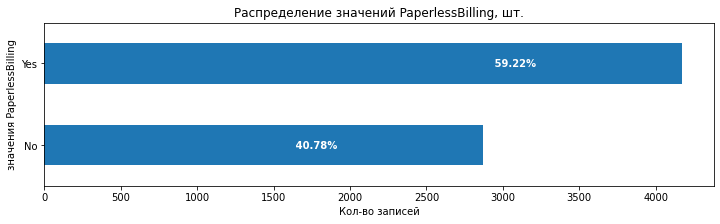

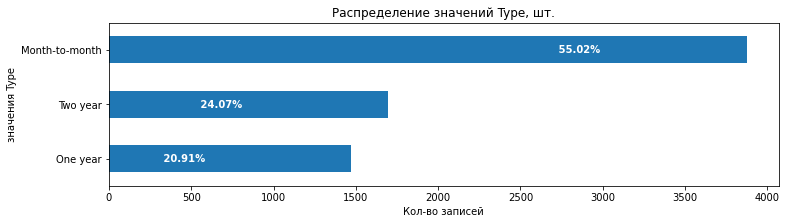

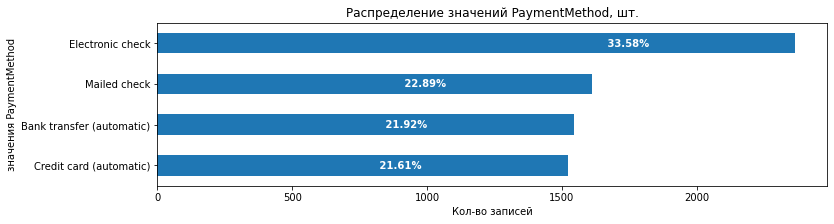

count    7032.000000
mean     2118.621822
std      2112.736199
min        19.050000
25%       439.745000
50%      1345.275000
75%      3239.317500
max      9221.380000
Name: TotalCharges, dtype: float64


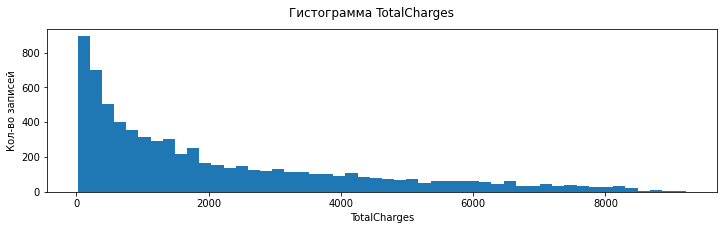

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64


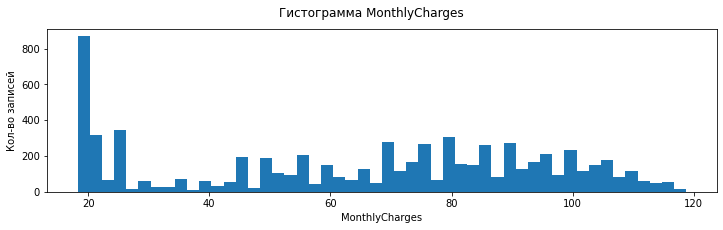

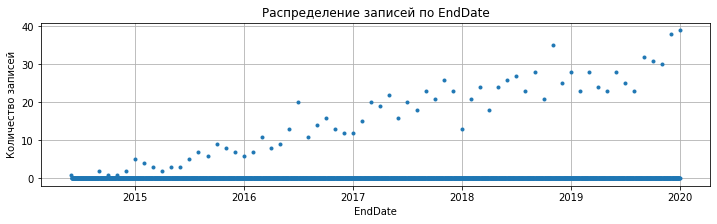

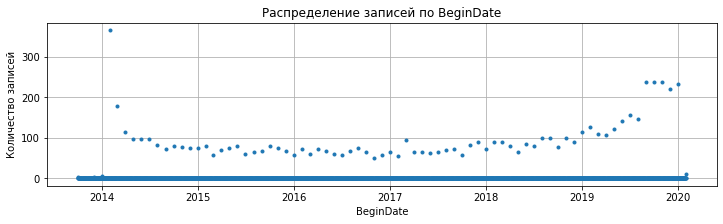

In [51]:
dataframe_research(contract,['customerID'])

По условию нам были даны следующие характеристики: 
<pre>
customerID — идентификатор абонента;
BeginDate — дата начала действия договора;
EndDate — дата окончания действия договора;
Type — тип оплаты: раз в год, раз в два или ежемесячно;
PaperlessBilling — электронный расчётный лист;
PaymentMethod — тип платежа;
MonthlyCharges — расходы за месяц;
TotalCharges — общие расходы абонента.
</pre>

Наблюдения, которые можно сделать:
<ul>
<li> BeginDate, EndDate - указывает на месяц (12 значений на графике на каждый год). Клиенты добавляются равномерно, хотя в последнее время (5 месяцев) наблюдается усиление притока. Отток увеличивается равномерно за всю историю, видимо составляет некий постоянный % от общего размера клиентской базы.
<li> Type - категориальная переменная с тремя значениями
<li> PaperlessBilling - категориальная бинарная переменная Yes/No
<li> PaymentMethod - категориальная переменная c четырьмя значениями
<li> MonthlyCharges - числовая непрерывная, от 18.25 до 118.75 с медианой около 65, средней 30. Распределение непонятное.   <li> TotalCharges - числовая непрерывная, от 19.05 до 9221.38 с медианой и средним около 2100. Распределение похоже на Пуассона 
</ul>
Выбросов нет, распределения выглядят правдоподобными.<br>Пропущенных значений - 11 записей по полю TotalCharges. Возможно это просто новые пользователи, проверим позднее.<br>Завершенных контрактов - 1101 из 7043 (15,6 %)

#### Данные internet_new.csv — информация о подключенных услугах интернета

In [52]:
internet.info()
display (internet.head())
print ("Количество дубликатов: ", internet.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


Количество дубликатов:  0


Дубликатов ожидаемо нет, 6 бинарных признаков Yes/No, один категориальный по способу подключения. Явных пропусков нет. <br>Посмотрим повнимательнее.

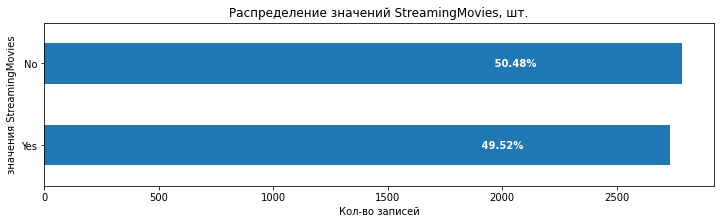

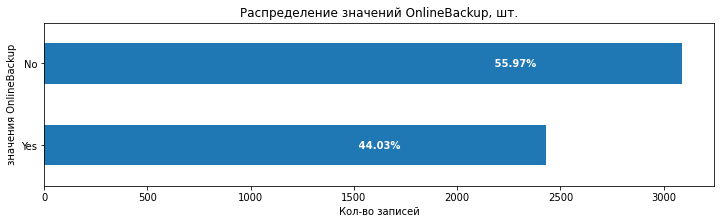

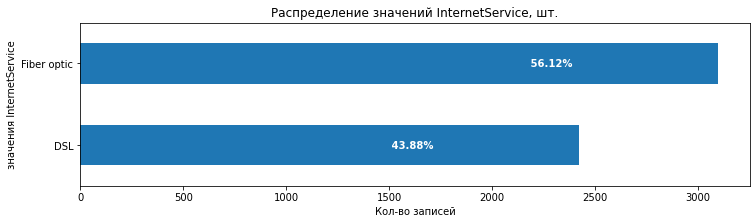

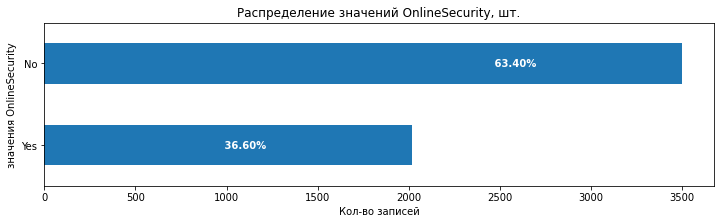

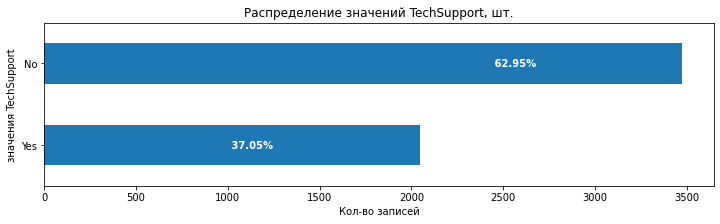

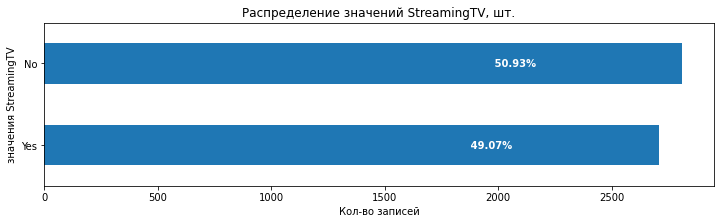

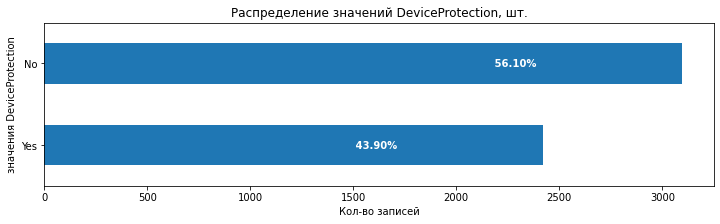

In [53]:
dataframe_research(internet,['customerID'])

Способ подключения - тоже бинарный. Неявных пропусков нет. Распределение между категориями по кажой переменной хоть и не ровно 50/50, но визуальное не превышает 70/30, что позволит модели очень хорошо выявить зависимости от каждого признака.<br>Идеально, даже и править ничего не нужно.

#### Данные phone_new.csv — информация  о подключенных услугах телефонии

In [54]:
phone.info()
display (phone.head())
print ("Количество дубликатов: ", phone.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Количество дубликатов:  0


Дубликатов также нет, один бинарный признак Yes/No. Явных пропусков нет. <br>Посмотрим повнимательнее.

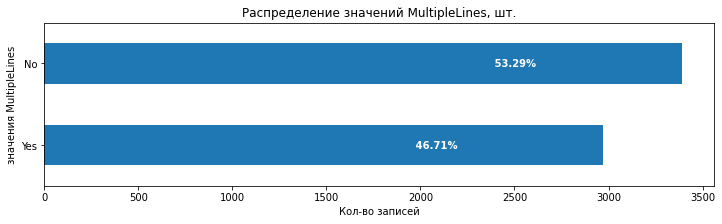

In [55]:
dataframe_research(phone,['customerID'])

Распределение между по признаку опять близко к  50/50, невных пропусков нет.<br>Очень хорошо.

#### Выводы по предоставленным данным

В целом предоставленные данные достаточно "чистые", выбросов нет. <br>Из незначительных отклонений - 11 записей с незаполненным полем TotalCharges (общие расходы абонента), но это статистически не значимый % записей.<br>Данные охватывают период за 5,5 лет - с середины 2014 до начала 2020 года. <br>Представленные признаки распределены в выборке относительно равномерно, выборка подходит для анализа без существенной обработки.<br>Распределения числовых переменных выглядит правдоподобно.<br>Целевой признак составляет около 15,6% в выборке, что также представляется правдоподобным и хорошим показателем для такого бизнеса в целом (и LTV, Lifetime value на таких данных не может быть менее чем средняя выручка по всем пользователям, а значит больше чем 2,1 тысячи, и это выглядит как очень хороший показатель).

## Объединение  и исследовательский анализ данных

### Объединение данных

Объединим данные.

In [56]:
data = personal.merge(contract, on='customerID', how='left')\
               .merge(internet, on='customerID', how='left')\
               .merge(phone, on='customerID', how='left')

customerID логично занести в индекс, кем он по сути и является

In [57]:
data = data.set_index('customerID')

In [58]:
data.info()
display (data.head(10))

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            7043 non-null   object        
 1   SeniorCitizen     7043 non-null   object        
 2   Partner           7043 non-null   object        
 3   Dependents        7043 non-null   object        
 4   BeginDate         7043 non-null   datetime64[ns]
 5   EndDate           1101 non-null   datetime64[ns]
 6   Type              7043 non-null   object        
 7   PaperlessBilling  7043 non-null   object        
 8   PaymentMethod     7043 non-null   object        
 9   MonthlyCharges    7043 non-null   float64       
 10  TotalCharges      7032 non-null   float64       
 11  InternetService   5517 non-null   object        
 12  OnlineSecurity    5517 non-null   object        
 13  OnlineBackup      5517 non-null   object        
 14  DeviceProtecti

,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,No,Yes,No,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,31.04,DSL,No,Yes,No,No,No,No,NaN
5575-GNVDE,Male,No,No,No,2017-04-01,NaT,One year,No,Mailed check,56.95,2071.84,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,Male,No,No,No,2019-10-01,NaT,Month-to-month,Yes,Mailed check,53.85,226.17,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,Male,No,No,No,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1960.60,DSL,Yes,No,Yes,Yes,No,No,NaN
9237-HQITU,Female,No,No,No,2019-09-01,NaT,Month-to-month,Yes,Electronic check,70.70,353.50,Fiber optic,No,No,No,No,No,No,No
9305-CDSKC,Female,No,No,No,2019-03-01,NaT,Month-to-month,Yes,Electronic check,99.65,1150.96,Fiber optic,No,No,Yes,No,Yes,Yes,Yes
1452-KIOVK,Male,No,No,Yes,2018-04-01,NaT,Month-to-month,Yes,Credit card (automatic),89.10,2058.21,Fiber optic,No,Yes,No,No,Yes,No,Yes
6713-OKOMC,Female,No,No,No,2019-04-01,NaT,Month-to-month,No,Mailed check,29.75,300.48,DSL,Yes,No,No,No,No,No,NaN
7892-POOKP,Female,No,Yes,No,2017-07-01,NaT,Month-to-month,Yes,Electronic check,104.80,3573.68,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes


### Выбросы

Как мы помним, у нас было 11 странных записей с пропущенными TotalCharges. Посмотрим на них.

In [59]:
display (data[data['TotalCharges'].isna()])

,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
customerID,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,No,Yes,Yes,2020-02-01,NaT,Two year,Yes,Bank transfer (automatic),52.55,NaN,DSL,Yes,No,Yes,Yes,Yes,No,NaN
3115-CZMZD,Male,No,No,Yes,2020-02-01,NaT,Two year,No,Mailed check,20.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
5709-LVOEQ,Female,No,Yes,Yes,2020-02-01,NaT,Two year,No,Mailed check,80.85,NaN,DSL,Yes,Yes,Yes,No,Yes,Yes,No
4367-NUYAO,Male,No,Yes,Yes,2020-02-01,NaT,Two year,No,Mailed check,25.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1371-DWPAZ,Female,No,Yes,Yes,2020-02-01,NaT,Two year,No,Credit card (automatic),56.05,NaN,DSL,Yes,Yes,Yes,Yes,Yes,No,NaN
7644-OMVMY,Male,No,Yes,Yes,2020-02-01,NaT,Two year,No,Mailed check,19.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3213-VVOLG,Male,No,Yes,Yes,2020-02-01,NaT,Two year,No,Mailed check,25.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
2520-SGTTA,Female,No,Yes,Yes,2020-02-01,NaT,Two year,No,Mailed check,20.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
2923-ARZLG,Male,No,Yes,Yes,2020-02-01,NaT,One year,Yes,Mailed check,19.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


Как видно, это совсем новые пользователи (февраль 2020 года) с тарифом подразумеваюем оплату сразу за два года.<br>Для прогноза ухода клинтов такие новые пользователи не будет полезной информацией, расстанемся с ними без сожаления.

In [60]:
data = data[~data['TotalCharges'].isna()]

### Обогащение данных

Обогатим данные.
- добавим явный признак прекращения договора - по признаку наличия даты в поле EndDate
- добавим срок действия контракта, в месяцах  (от заключения до прекращения или от заключения до текущего момента)
- добавим год и месяц для всех полей с датой как отдельные признаки

Часть из этих признаков, очевидно, будет коллинеарна прочим. Мы увидим это на матрице корелляции итогда примем решение, какие из них брать для обучения модели.

In [61]:
#найдем максимальную дату (дату выгрузки)
print (data['BeginDate'].max())
print (data['EndDate'].max())

2020-01-01 00:00:00
2020-01-01 00:00:00


In [62]:
DATA_DOWNLOAD_DATE = pd.to_datetime('2020-01-01 00:00:00')

In [63]:
#функция для расчета продолжительности контракта в месяцах // днях
def calculate_contract_length(row):
    end_date = row['EndDate'] if not pd.isna(row['EndDate']) else DATA_DOWNLOAD_DATE
    #v1 считаем продолджительность контракта в месяцах
    #year_diff = end_date.year - row['BeginDate'].year
    #month_diff = end_date.month - row['BeginDate'].month
    #return year_diff * 12 + month_diff
    #v2 считаем продолджительность контракта в днях
    return (end_date - row['BeginDate']).days



In [64]:
#длительность контракта
data['Contract_length'] = data.apply(calculate_contract_length, axis=1)
#месяц начала контракта
data['BD_month'] = data['BeginDate'].dt.month.astype(int)  
#год начала контракта
data['BD_year'] = data['BeginDate'].dt.year.astype(int) 
#месяц конца контракта
data['ED_month'] = data['EndDate'].dt.month 
#год конца контракта
data['ED_year'] = data['EndDate'].dt.year
#признак ухода клиента - целевой признак
data['ClientLost'] = np.where(data['EndDate'].notna(), 1, 0) 

Проверим что мы добавили

count    1101.000000
mean        6.820163
std         3.532240
min         1.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        12.000000
Name: ED_month, dtype: float64
Всего  12  уникальных значений


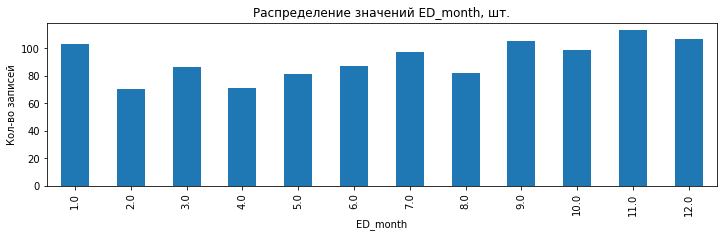

count    7032.000000
mean        6.428185
std         3.576972
min         1.000000
25%         3.000000
50%         6.000000
75%        10.000000
max        12.000000
Name: BD_month, dtype: float64
Всего  12  уникальных значений


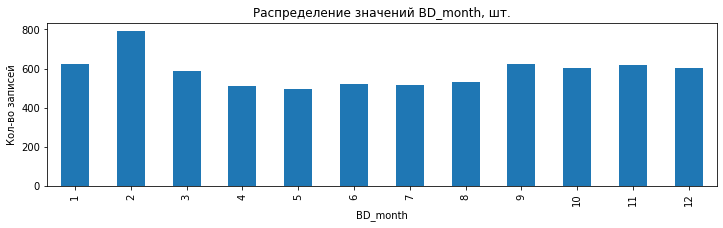

count    7032.000000
mean      873.814989
std       683.008735
min         0.000000
25%       245.000000
50%       730.000000
75%      1430.000000
max      2283.000000
Name: Contract_length, dtype: float64


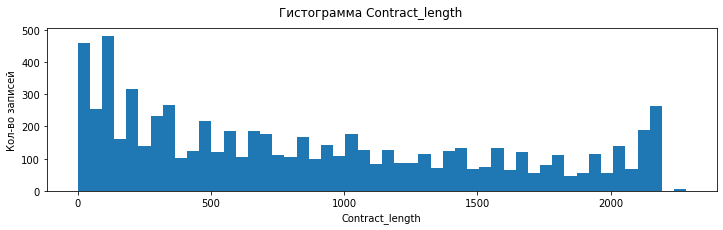

count    7032.000000
mean        0.156570
std         0.363421
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: ClientLost, dtype: float64
Всего  2  уникальных значений


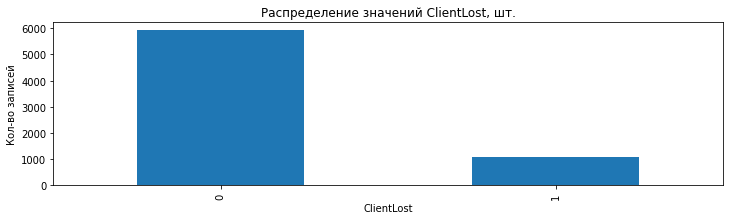

count    7032.00000
mean     2016.87372
std         1.96824
min      2013.00000
25%      2015.00000
50%      2017.00000
75%      2019.00000
max      2020.00000
Name: BD_year, dtype: float64
Всего  8  уникальных значений


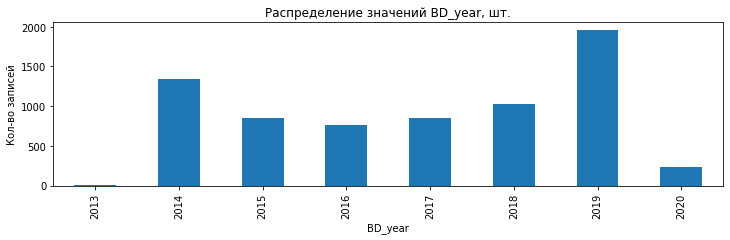

count    1101.000000
mean     2017.711172
std         1.301102
min      2014.000000
25%      2017.000000
50%      2018.000000
75%      2019.000000
max      2020.000000
Name: ED_year, dtype: float64
Всего  7  уникальных значений


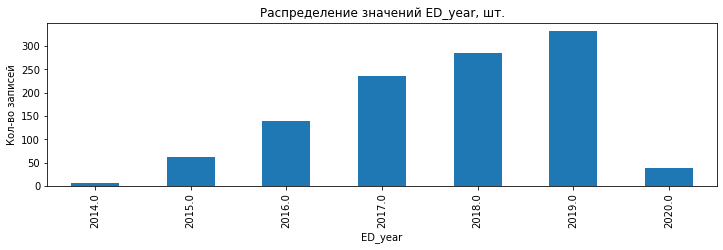

In [65]:
dataframe_research(data.loc[:, ['Contract_length', 'BD_month', 'BD_year', 'ED_month', 'ED_year','ClientLost']])

Отдельно обратим внимание что год и месяц завершения контракта не совсем int, но тут ничего не получится сделать, так как там есть значения NaN, и преобразовать в int не получится.

### Общее представление об типах оказываемых услуг

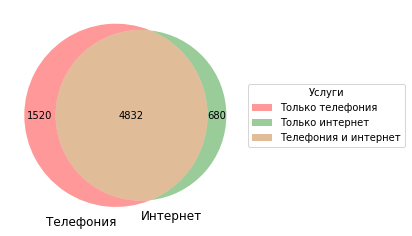

In [66]:
#определяем множества
phone_set = set(data[data['MultipleLines'].notna()].index)
internet_set = set(data[data['InternetService'].notna()].index)

#создаем диаграмму Эйлера
venn_diagram = venn2([phone_set, internet_set], ('Телефония', 'Интернет'))

# создаем и добавляем легенду
legend_elements = [
    Patch(facecolor=venn_diagram.get_patch_by_id('10').get_facecolor(), label='Только телефония'),
    Patch(facecolor=venn_diagram.get_patch_by_id('01').get_facecolor(), label='Только интернет'),
    Patch(facecolor=venn_diagram.get_patch_by_id('11').get_facecolor(), label='Телефония и интернет')
]
plt.legend(handles=legend_elements, title="Услуги", loc='center left', bbox_to_anchor=(1, 0.5))

#отображаем диаграмму
plt.show()

### Услуги интернета

А как выглядит матрица услуг интернета и какие наборы пользуются наибольшим спросом (всего сочетаний из 6 объектов может быть 2^6 = 64, мы ограничимся 30 наиболее распространенными)? 

Всего записей:  5512


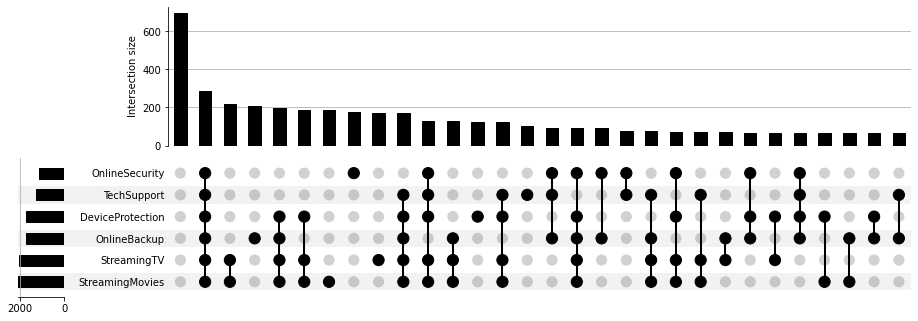

In [67]:
#рассматриваемые признаки
set_names = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

#подготовим данные для UpSet
upset_data = pd.DataFrame()

for sname in set_names:
    upset_data[sname] = data[data['InternetService'].notna()][sname] == 'Yes'

#группируем по уникальным комбинациям и считаем их количество
upset_data = upset_data.groupby(set_names).size().reset_index(name='count')
print ("Всего записей: ", upset_data['count'].sum())

#оставляем только 30 самых распространенных комбинаций
upset_data = upset_data.sort_values(by='count', ascending=False).head(30)

#преобразуем DataFrame в MultiIndex, который требуется для UpSet
upset_data.set_index(set_names, inplace=True)

# Подготовка данных для визуализации
upset_plot = UpSet(upset_data['count'], sort_by="cardinality") 

# Создание и отображение графика
upset_plot.plot()
plt.show()

Обратим внимание что самое часто встречающееся сочетание - "нет упомянутых услуг" - значит клиенты вообще не покупают дополнительные услуги. Но в целом таких около 700, т.е. только 13% не купили дополнительные сервисы. Маркетологи молодцы. 
<br>Следущее за ним по частотности - покупают все дополнительные услуги.
<br>Потом - телевидение, и ожидаемо две связанные с ним услуги идут вместе.
<br>Далее - безопасность в виде Backup
<br><br>Явно есть устоявшиеся наборы, посмотрим их позже на матрице корелляции.


### Некоторые экономические изыскания

Выше мы делали предположение, что отток - константа от % пользователей. Соответствие притока и оттока клиентов очень важный показатель для такого бизнеса, а еще мы сможем сделать предположение, насколько вообще стабилен отток пользователей и можно  ли вообще его предсказывать по историческим данным.

In [68]:
#количество зашедших клиентов, по месяцам
clients_in = data[['BeginDate']].groupby('BeginDate').size().reset_index(name='countin')
#print (clients_in)
#количество убывших клиентов, по месяцам
clients_out = data[['EndDate']].groupby('EndDate').size().reset_index(name='countout')

#print (clients_out)
#объединяем
clients_balance = clients_in.merge(clients_out, left_on='BeginDate', right_on='EndDate', how='left')
#заполняем нолями пропцщенные месяцы по оттоку
clients_balance['countout'] = clients_balance['countout'].fillna(0).astype('int')
#сортируем по возрастанию дат
clients_balance = clients_balance.drop('EndDate', axis=1).sort_values(by='BeginDate')
# считаем отток за месяц по отношению к клиентской базе
# базу считаем как разность кумулятивных сумм для countin и countout
clients_balance['cumulative_proportion'] = clients_balance['countout'] / \
                              (clients_balance['countin'].cumsum() - clients_balance['countout'].cumsum())
#print (clients_balance)

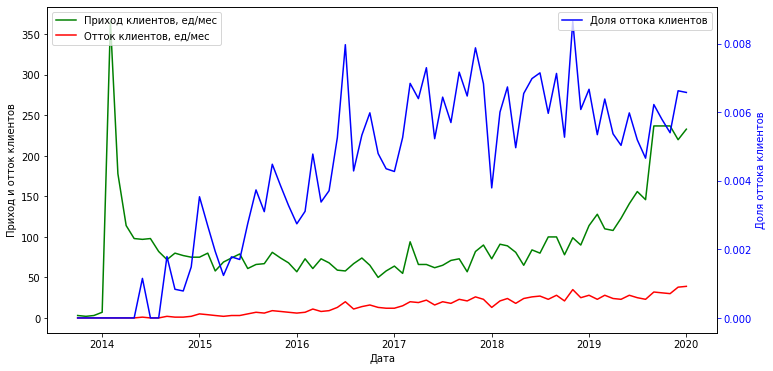

In [69]:
#cоздаем фигуру и первую ось
fig, ax1 = plt.subplots(figsize=(12, 6))

#график countin на первой оси с меткой для легенды
ax1.plot(clients_balance['BeginDate'], clients_balance['countin'], 'g-', label='Приход клиентов, ед/мес')
#график countout на первой оси с меткой для легенды
ax1.plot(clients_balance['BeginDate'], clients_balance['countout'], 'red', label='Отток клиентов, ед/мес')
#первая шкала и подписи
ax1.set_xlabel('Дата')
ax1.set_ylabel('Приход и отток клиентов', color='black')
ax1.tick_params('y', colors='black')

#альтернативная ось Y
ax2 = ax1.twinx()
ax2.plot(clients_balance['BeginDate'], clients_balance['cumulative_proportion'], 'b-', label='Доля оттока клиентов')
ax2.set_ylabel('Доля оттока клиентов', color='b')
ax2.tick_params('y', colors='b')

#легенда
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Отображаем график
plt.show()

Выводы:
- последние три года (2017-2019) отток клиентов находится на относительно стабильном уровне, с неболшинм трнедом к снижению (сний график), а значит его можно предсказывать.
- в целом, отток незначительный 7% от клиентской базы (0.006 * 12), такому показателю можно только позавидовать

### Взаимосвязи между признаками

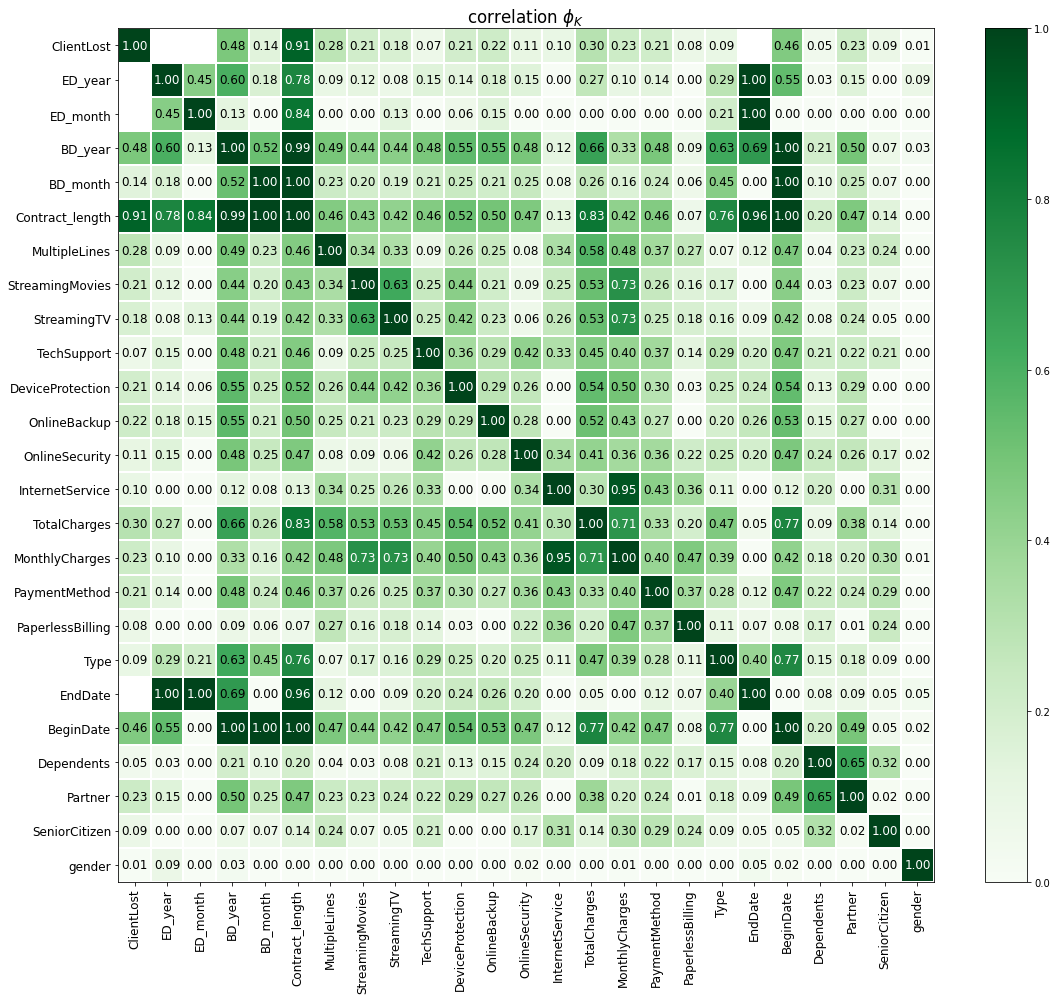

In [70]:
# создаём список с наименованиями непрерывных признаков
interval_cols = ['MonthlyCharges', 'TotalCharges']

# считаем корреляции в наших данных через phik
phik_overview = data.phik_matrix(interval_cols=interval_cols)
phik_overview.round(2)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.2,
    figsize=(16, 14)
)


Наблюдения в части сильных зависимостей:
- Ежемесячные счета сильно зависят от способа подключения интернета (InternetService) - 0.95
- Общий доход по клиенту зависит от давности его подключения - очевидно
- Также ежемесячные счета зависят от подключенных стримминговых сервисов - да, этот факт мы видели когда изучали наиболее часто встречающиеся продукты
- Тип оплат коррелирует с датой контракта (0.77) 

Наблюдения в части отсутствия зависимостей:
- Пол - не влияет ровным счетом ни на что. Первоначально уберем этот признак из модели чтобв не перегружать ее.

Наблюдения в части дат и коллинеарных признаков:
- EndDate содержит в себе информацию о ClienLost, его надо убрать иначе возникнет утечка данных.
- ED_year, ED_month, имеет корелляцию 1 с EndDate и соответственно, их тоже надо будет убрать из модели
- BeginDate коллинеарен с Contract_lenght, убираем из модели
- BD_month и BD_year тоже попробуем убрать, чтобы не перегружать модель, так как информация из них кореллирует с Contract_lenght в 0.99 и 0.98 соответсвенно.

### Анализ особенностей распределений признаков для потерянных клиентов

Посмотрим, как отличаются значения разных параметров для ушедших и оставшихся клиентов.

#### Распределение длительности контракта среди потерянных и оставшихся клиентов

In [71]:
#data.info()

Изучем взаимосвязь между длительностью контракта и количетсвом уходящих клиентов.

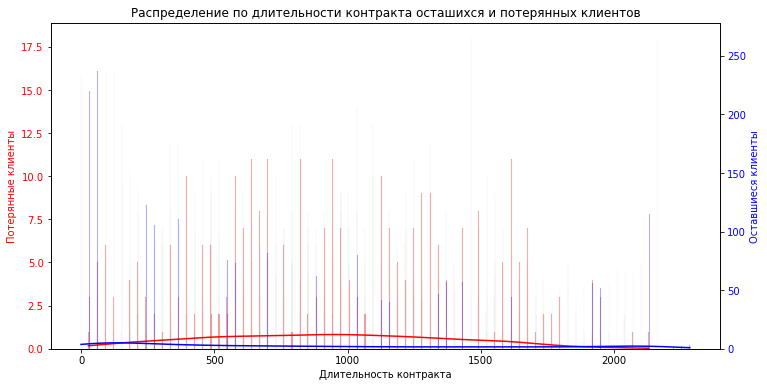

In [72]:
#фигура и первая ось
fig, ax1 = plt.subplots(figsize=(12, 6))

#распределение для потеряшек
ax1.set_xlabel('Длительность контракта')
ax1.set_ylabel('Потерянные клиенты', color='red')
sns.histplot(data[data['ClientLost'] == 1]['Contract_length'], 
             bins=max(data[data['ClientLost'] == 1]['Contract_length']), 
             ax=ax1, color='red', alpha=0.3, kde=True)
ax1.tick_params(axis='y', labelcolor='red')

#распределение для оставшихся
ax2 = ax1.twinx()
ax2.set_ylabel('Оставшиеся клиенты', color='blue')
sns.histplot(data[data['ClientLost'] == 0]['Contract_length'],
             bins=max(data[data['ClientLost'] == 0]['Contract_length']), 
             ax=ax2, color='blue', alpha=0.3, kde=True)
ax2.tick_params(axis='y', labelcolor='blue')

# Добавляем заголовок и показываем график
plt.title('Распределение по длительности контракта осташихся и потерянных клиентов')
plt.show()

Как видим, графики отличаются и отлиаются существенно. Срок контакта явно влияет на вероятность потери клиента. БОльшая вероятность того что клиент откажется от услуг компании - от 10 до 55 месяцев и наоборот, вновь привлеченные клиенты, как и "старички" не склонны к смене провайдера и(или) достаточно лояльны. 

#### Поиск причин потери клиентов среди набора предоставлемых услуг

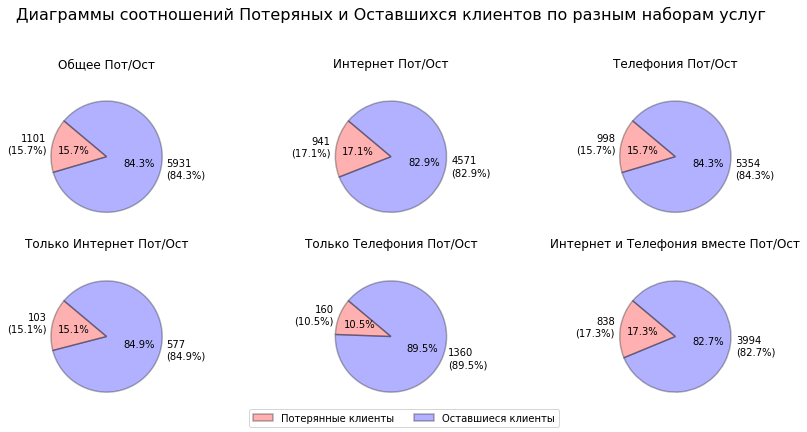

In [73]:
#во временной таблице убираем пропуски
temp_data = data[['ClientLost', 'InternetService','MultipleLines']].copy()
temp_data['YN_Internet'] = data['InternetService'].apply(lambda x: 'Yes' if pd.notna(x) else 'No')
temp_data['YN_Phone'] = data['MultipleLines'].apply(lambda x: 'Yes' if pd.notna(x) else 'No')

#готовим показатели для графиков
graph_datas = [];
graph_datas.append(['Общее Пот/Ост',
                   temp_data.groupby('ClientLost')['ClientLost'].size().reindex([1, 0]).tolist()])
graph_datas.append(['Интернет Пот/Ост',
                   temp_data[temp_data['YN_Internet'] == 'Yes'].groupby('ClientLost')['ClientLost'].\
                    size().reindex([1, 0]).tolist()])
graph_datas.append(['Телефония Пот/Ост',
                   temp_data[temp_data['YN_Phone'] == 'Yes'].groupby('ClientLost')['ClientLost'].\
                    size().reindex([1, 0]).tolist()])

graph_datas.append(['Только Интернет Пот/Ост',
                    temp_data[(temp_data['YN_Internet'] == 'Yes') & (temp_data['YN_Phone'] == 'No')].\
                    groupby('ClientLost')['ClientLost'].size().reindex([1, 0]).tolist()])

graph_datas.append(['Только Телефония Пот/Ост',
                    temp_data[(temp_data['YN_Phone'] == 'Yes')& (temp_data['YN_Internet'] == 'No')].\
                    groupby('ClientLost')['ClientLost'].size().reindex([1, 0]).tolist()])

graph_datas.append(['Интернет и Телефония вместе Пот/Ост',
                    temp_data[(temp_data['YN_Phone'] == 'Yes')& (temp_data['YN_Internet'] == 'Yes')].\
                    groupby('ClientLost')['ClientLost'].size().reindex([1, 0]).tolist()])

#цвета как и раньше
colors = ['red', 'blue']

#общая фигура
fig, axs = plt.subplots(2, 3, figsize=(12, 6))

#строим диаграммы
for i, ax in enumerate(axs.flatten()):
    #текущий набор данных
    current_data = graph_datas[i][1]
    #print (current_data)
    total = sum(current_data)
    
    #создаем подписи с долями в процентах
    labels = [f'{val}\n({val/total*100:.1f}%)' for val in current_data]
    
    #диаграмма
    ax.pie(current_data, labels=labels, colors=colors, startangle=140, autopct='%1.1f%%',
       wedgeprops={'alpha': 0.3, 'edgecolor': 'black', 'linewidth': 1.5})  
    ax.set_title(f'{graph_datas[i][0]}', pad=20)
    
#общий заголовок и подпись
fig.suptitle('Диаграммы соотношений Потеряных и Оставшихся клиентов по разным наборам услуг', fontsize=16)

#легенду
fig.legend(['Потерянные клиенты', 'Оставшиеся клиенты'], loc='lower center', ncol=2)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

На удивление доля потерянных клиентов мало зависит от набора приобретаемых услуг. Но колебания все же определенно есть. В целом по выборке показатель оттока 15.7%, но по группам разброс колеблется от 10.5% для пользователей только телефонии (без Интернета) до 17.3% для пользователей Интернета и Телефонии одновременно. Возможно это связано с неконкурентностью больших пакетов услуг все-в-одном, но учитывая показатель потери 17.1% для Интернета, также может быть в существенной части связано с услугой Интернета.<br><br> Посмотрим повнимательнее на самые популярные наборы среди ушедших клиентов и сравним их с средними по выборе. Так как телефония представлена по-сути одним прзнаком, то кажется возможным сравнить услуги второго уровня иерархии - детальные услуги интернета и услугу телефонии. 

Всего записей:  5931
Всего записей:  1101


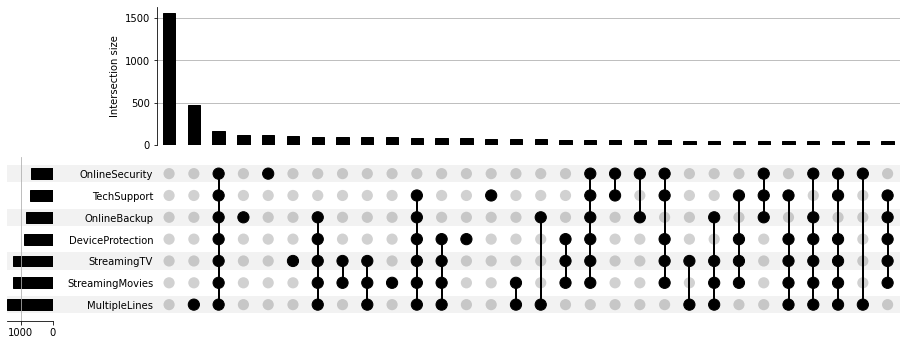

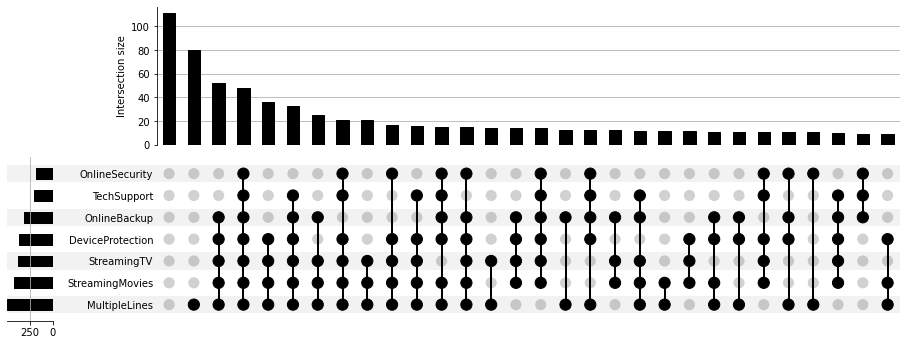

In [74]:
#рассматриваемые признаки
set_names = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
             'StreamingTV','StreamingMovies','MultipleLines']

#подготовим данные для UpSet
upset_data = pd.DataFrame()

upset_data['ClientLost'] = data['ClientLost']
for sname in set_names:
    upset_data[sname] = data[sname] == 'Yes'
    
#группируем по уникальным комбинациям и считаем их количество
upset_data_save = upset_data[upset_data['ClientLost'] == 0].groupby(set_names).size().reset_index(name='count')
print ("Всего записей: ", upset_data_save['count'].sum())

#оставляем только 30 самых распространенных комбинаций
upset_data_save = upset_data_save.sort_values(by='count', ascending=False).head(30)

#преобразуем DataFrame в MultiIndex, который требуется для UpSet
upset_data_save.set_index(set_names, inplace=True)

#график для всех пользоваталей
upset_plot = UpSet(upset_data_save['count'], sort_by="cardinality")
upset_plot.plot()

#группируем по уникальным комбинациям и считаем их количество
upset_data_lost = upset_data[upset_data['ClientLost'] == 1].groupby(set_names).size().reset_index(name='count')
print ("Всего записей: ", upset_data_lost['count'].sum())

#оставляем только 30 самых распространенных комбинаций
upset_data_lost = upset_data_lost.sort_values(by='count', ascending=False).head(30)

#преобразуем DataFrame в MultiIndex, который требуется для UpSet
upset_data_lost.set_index(set_names, inplace=True)

#график для ушедших пользователей
upset_plot_lost = UpSet(upset_data_lost['count'], sort_by="cardinality")
upset_plot_lost.plot()

plt.show()

И опять, каких то ярких зависиомстей не видно. Лидеры по оттоку - клиенты у которых не подключены какие либо дополнительные услуги, они же лидеры по количеству в общей выгрузке.<br><br>Далее по абсолютному количеству следуют пользователи телефонии. Да, доля их оттока небольшая (мы посмотрели это выше), но абсолютное количество таких клиентов покинувших нас значительно.<br><br>А вот дальше интересно. Пользователи с единственными услугами OnlineSecurity, OnlineBackup и даже StreamingTV вообще не попали в ТОП-30 наборов, которые были у уходящих пользователей.<br><br>В целом, плотность услуг у уходящих клиентов явно в левой стороне графика выше.
<br><br>Проверим эту предположительную особенность зависимость от количеста услуг по другим признакам. Если услуг много, они вероятно стоят денег и это должно сказаться на ежемесячных платежах.

#### Связь между ежемесячным чеком и потерей клиента

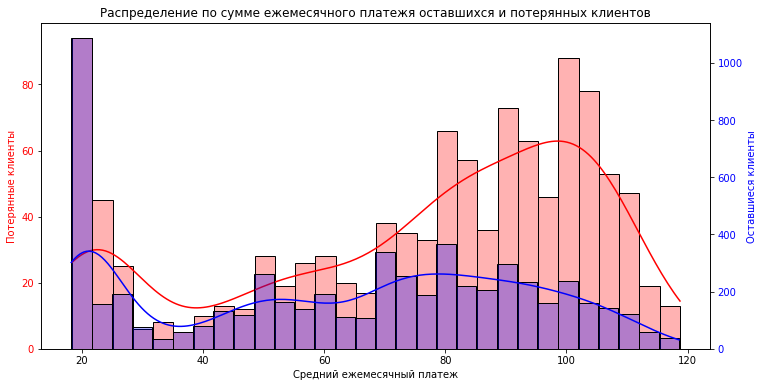

In [75]:
#фигура и первая ось
fig, ax1 = plt.subplots(figsize=(12, 6))

#распределение для потеряшек
ax1.set_xlabel('Средний ежемесячный платеж')
ax1.set_ylabel('Потерянные клиенты', color='red')
sns.histplot(data[data['ClientLost'] == 1]['MonthlyCharges'], 
             bins=30, ax=ax1, color='red', alpha=0.3, kde=True)
ax1.tick_params(axis='y', labelcolor='red')

#распределение для оставшихся
ax2 = ax1.twinx()
ax2.set_ylabel('Оставшиеся клиенты', color='blue')
sns.histplot(data[data['ClientLost'] == 0]['MonthlyCharges'],
             bins=30, ax=ax2, color='blue', alpha=0.3, kde=True)
ax2.tick_params(axis='y', labelcolor='blue')

# Добавляем заголовок и показываем график
plt.title('Распределение по сумме ежемесячного платежя оставшихся и потерянных клиентов')
plt.show()

Да, зависимость подтверждается. В высоких ежемесячных чеках доля оттока клиентов существенно выше. Кратно выше. Маркетологам теперь явно будет над чем подумать - надо внимательно смотреть какой такой дешевый пакет "всего на свете" предлагают конкуренты и перерабатывать продуктовую линейку. Или пересматривать тарификацию для дополнительных сервисов.

#### Связь между потерей клиента и периодичностью оплаты

Кажется интуитивно верным что существует связь между сроками оплаты и вероятноятью отказа от услуг. Никто не любит терять деньги за оплаченный период и само "окно" для ухода меньше. Но любые размышления не подтвержденные цифрами это галлюцинации, посмотрим как ситуация обстоит на самом деле.

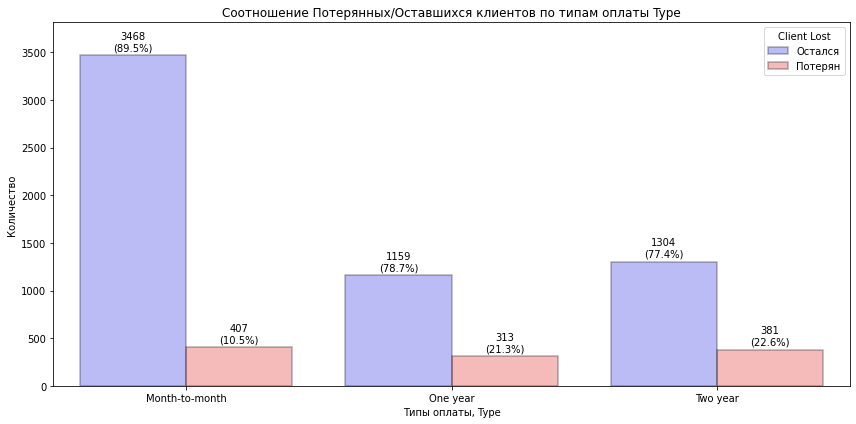

In [76]:
num_categories = len(data['Type'].unique()) #количество категорий
num_groups = len(data['ClientLost'].unique())  #количество групп

#сортируем категории и группы для корректного отображения
sorted_categories = sorted(data['Type'].unique())
sorted_groups = sorted(data['ClientLost'].unique())

#словарь для подсчета общего количества записей в каждой категории по группам
category_group_counts = data.groupby(['Type', 'ClientLost']).size().unstack(fill_value=0)

#создаем диаграмму с категориями
plt.figure(figsize=(12, 6))
bar_plot = sns.countplot(x='Type', hue='ClientLost', data=data, palette=['blue', 'red'],
                         order=sorted_categories, hue_order=sorted_groups,
                         alpha=0.3, edgecolor='black', linewidth=1.5)

#инициируем максимальный размер по Y чтобы потом влезли все подписи
max_height = 0

#добавляем подписи к столбцам
for i, p in enumerate(bar_plot.patches):
    #определяем текущую категорию и группу
    category_index = i % num_categories
    group_index = i // num_categories
    
    current_category = sorted_categories[category_index]
    current_group = sorted_groups[group_index]
    
    #количество записей в текущей категории и группе
    count_in_group = category_group_counts.loc[current_category, current_group]
    
    #высота текущего столбца
    height = p.get_height()
    #увеличиваем размер по Y если необходимо
    if height > max_height:
        max_height = height
    
    #считаем процент
    total_in_category = category_group_counts.loc[current_category].sum()
    percentage = 100 * count_in_group / total_in_category
    
    #добавляем текстовую метку
    bar_plot.text(p.get_x() + p.get_width() / 2., height + 25, f'{height}\n({percentage:.1f}%)',
                  ha='center', va='bottom')
    
# Даём запас по оси Y, чтобы поместились подписи столбцов
plt.ylim(0, max_height * 1.1)   

# Заголовок, подписи к осям
plt.title('Соотношение Потерянных/Оставшихся клиентов по типам оплаты Type')
plt.xlabel('Типы оплаты, Type')
plt.ylabel('Количество')

# Добавляем легенду с кастомными названиями для значений ClientLost
plt.legend(title='Client Lost', loc='upper right', labels=['Остался', 'Потерян'])

# Отображаем график
plt.tight_layout()
plt.show()


Все как и предполагалось. Ежегодная и двухлетняя оплата в два раза повышает вероятность того что клиент откажется от наших услуг. Хотели удержать клиентов длинными тарифными планами, а получилось как всегда.

#### Связь между потерей клиента и остальными признаками

Для полноты картины, проверим еще отклонения по % потерянных клиентов для прочих признаков.
<br>Таких осталось:
- Пенсионеры/Нет (SeniorCitizen)
- Наличие супруга или супруги (Partner)
- Наличие детей (Dependents)
- Пол (gender) - для очистки совести, вдруг phik ошибся
- Безбумажная оплата (PaperlessBilling) 
- Метод оплаты (PaymentMethod) 

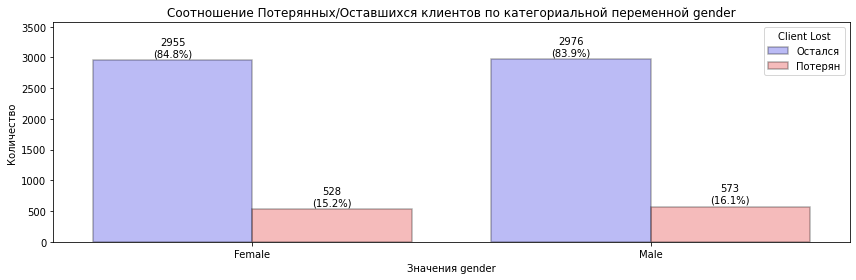

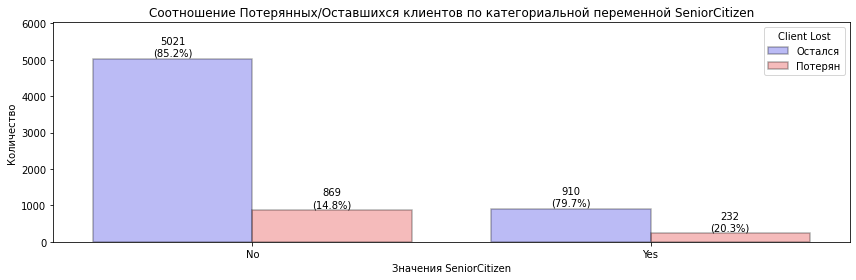

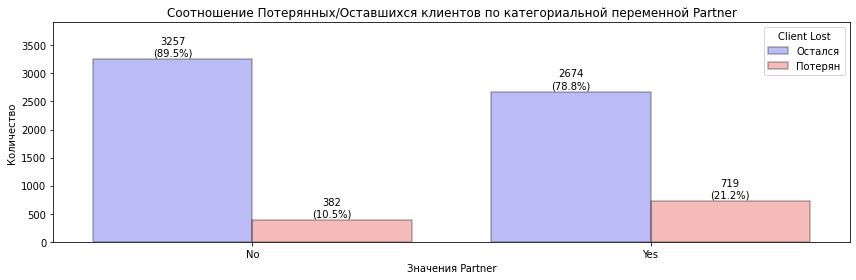

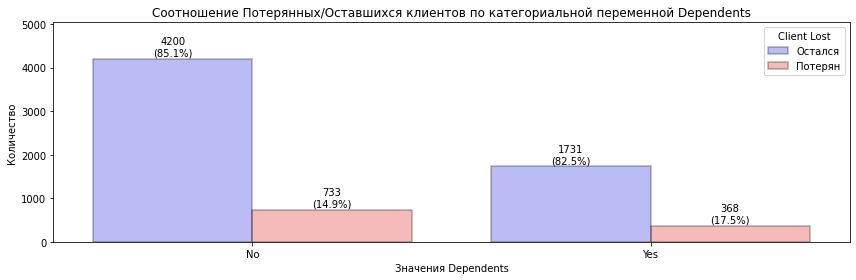

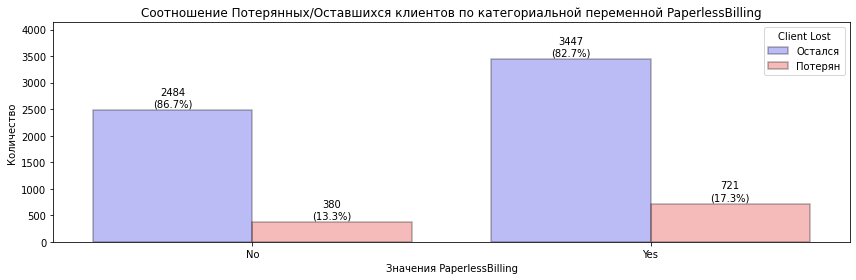

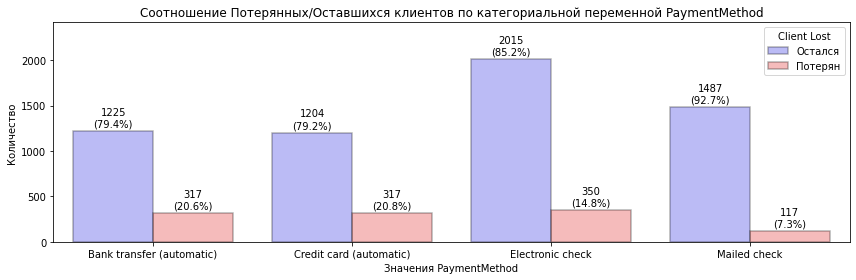

In [77]:
fields = ['gender','SeniorCitizen','Partner','Dependents','PaperlessBilling','PaymentMethod']
for field in fields:
    num_categories = len(data[field].unique()) #количество категорий
    num_groups = len(data['ClientLost'].unique())  #количество групп

    #сортируем категории и группы для корректного отображения
    sorted_categories = sorted(data[field].unique())
    sorted_groups = sorted(data['ClientLost'].unique())

    #словарь для подсчета общего количества записей в каждой категории по группам
    category_group_counts = data.groupby([field, 'ClientLost']).size().unstack(fill_value=0)

    #создаем диаграмму с категориями
    plt.figure(figsize=(12, 4))
    bar_plot = sns.countplot(x=field, hue='ClientLost', data=data, palette=['blue', 'red'],
                             order=sorted_categories, hue_order=sorted_groups,
                             alpha=0.3, edgecolor='black', linewidth=1.5)

    #инициируем максимальный размер по Y чтобы потом влезли все подписи
    max_height = 0

    #добавляем подписи к столбцам
    for i, p in enumerate(bar_plot.patches):
        #определяем текущую категорию и группу
        category_index = i % num_categories
        group_index = i // num_categories

        current_category = sorted_categories[category_index]
        current_group = sorted_groups[group_index]

        #количество записей в текущей категории и группе
        count_in_group = category_group_counts.loc[current_category, current_group]

        #высота текущего столбца
        height = p.get_height()
        #увеличиваем размер по Y если необходимо
        if height > max_height:
            max_height = height

        #считаем процент
        total_in_category = category_group_counts.loc[current_category].sum()
        percentage = 100 * count_in_group / total_in_category

        #добавляем текстовую метку
        bar_plot.text(p.get_x() + p.get_width() / 2., height + 25, f'{height}\n({percentage:.1f}%)',
                      ha='center', va='bottom')

    # Даём запас по оси Y, чтобы поместились подписи столбцов
    plt.ylim(0, max_height * 1.2)   

    # Заголовок, подписи к осям
    plt.title('Соотношение Потерянных/Оставшихся клиентов по категориальной переменной ' + field)
    plt.xlabel('Значения ' + field)
    plt.ylabel('Количество')

    # Добавляем легенду с кастомными названиями для значений ClientLost
    plt.legend(title='Client Lost', loc='upper right', labels=['Остался', 'Потерян'])

    # Отображаем график
    plt.tight_layout()
    plt.show()

Закономерности:
- от пола вероятность потери клиента не зависит. Тот случай гендерное равенство действительно есть.
- признак пенсионера - влияет незначительно (14.8% и 20.3%). Шанс потерять пенсионера выше.
- наличие супруга влияет значительно, если есть супруг, вероятность ухода в два раза больше
- наличие детей влияет совсем незначительно. Вероятности 14.9% и 17.5% в пользу детей. Видимо чем больше участников процесса, тем больше риск ухода, хотя дети имеют куда как меньшее влияние чем супруг/супруга
- безбумажный биллинг - 13.3% и 17.3% в пользу безбумажного биллинга. Видимо более продвинутые клиенты легче менят провайдера
- метод платежа - существенная разница по категориям. Максимальный отток по автоматичесим опатам (банковский платеж и кредитная карта, 20.6% и 20.8%) минимальный - электропочта, 7.3%

#### Вывод по профилю потерянного клиента

**Идеальный потерянный клиент**: пользовался услугами Интернета от 10 до 55 месяцев, имеет большие счета за услуги и пользуется большим набором услуг, и ежемесячные платежи выше среднего. Женат/замужем, пенсионер, и не любит когда с него списывают деньги автоматически.  
<br>
**Не влияют или слабо влияют** пол, дети и настройки безбумажности биллинга

### Выводы по анализу данных

Предоставленные данные содержат 7043 записей, 11 из которых содержали новых пользователей с двухлетними контрактами присоеденившихся в феврале 2020 года. Эти записи статистически не значимы и не имеют смысла при анализе данных поэтомы они были удалены.
<br><br>
В данных содержится:
- 1520 пользователей с услугами только телефонии 
- 4832 с услугами телефонии и инетрента одновременно
- 680 пользователей кто пользуется только интернетом
<br>
</ul>
Самые популярные наборы услуг:
<ul>
 
- телефония (только телефония)
- интернет без каких либо дополнительных услуг 
- интернет с полным набором услуг
- сервисы цифрового телевидения 
</ul>
<br>В целом, можно говорить о высоком уровне продаж дополнительных сервисов - только 13% пользователей Интернета не подписаны на дополнительные сервисы (приведена оценка для пользователей Интернета, потому что у телефонии дополнительных сервисов нет).
<br><br>Также можно говорить о хороших показателях бизнеса в целом - LTV на клиента на настоящий момент более 2,1 тысячи долларов а отток клиентов не превышает 7% в год на протяжении последних трех лет и имеет тенденцию к снижению в относительных показателях (абсолютные показатели оттока клиентов растут, но их динамика роста ниже чем динамика роста клиентской базы) 

Применимо к нашей задаче сокращения оттока клиентов, выявлено что вероятность ухода зависит:
- от продолжительности контракта
- от ежемесячных платажей
- от пола вероятность потери клиента не зависит. 
- признак пенсионера - влияет незначительно (14.8% и 20.3%). Шанс потерять пенсионера выше.
- наличие супруга влияет значительно, если есть супруг, вероятность ухода в два раза больше
- наличие детей влияет совсем незначительно. Вероятности 14.9% и 17.5% в пользу детей. Видимо чем больше участников процесса, тем больше риск ухода, хотя дети имеют куда как меньшее влияние чем супруг/супруга
- безбумажный биллинг - 13.3% и 17.3% в пользу безбумажного биллинга. Видимо более продвинутые клиенты легче менят провайдера
- метод платежа - существенная разница по категориям. Максимальный отток по автоматичесим опатам (банковский платеж и кредитная карта, 20.6% и 20.8%) минимальный - электропочта, 7.3%

Идеальный потерянный клиент таким образом: пользовался услугами Интернета от 10 до 55 месяцев, имеет большие счета за услуги и пользуется большим набором услуг, и ежемесячные платежи выше среднего. Женат/замужем, пенсионер, и не любит когда с него списывают деньги автоматически.  

**Исходя из этих закономерностей**  и найденных взаимосвязях в признаках, для обучения моделей произведем следующие изменения:

- удалим признак пола клиента
- удалим дату начала контракта и дату завершения, оставим только его длительность и целевой признак ухода клиента
- остальные прзнаки оставим (тестово было проведено удаление, приводит к ухудшению показателей всех моделей)

## Подготовка данных

Не трогая первоначальный набор, подготовим данные для модели. Обучение и выбор модели будет производить через пайплайн, кодирование данных будет происходить в нем.

### Удаление лишних признаков

Удалим те признаки, которые были определены для этого на этапе анализа

In [78]:
mdata = data.copy()

mdata = mdata.drop(['EndDate','BeginDate','ED_year','ED_month','BD_month','BD_year','gender'], axis=1)
#v2
#mdata = mdata.drop(['PaperlessBilling','Dependents','TotalCharges'], axis=1)




### Устранение неопределенных значений


In [79]:
#mdata.info()

Стратегия заполнения неопределенных значений: 
- для InternetService, типа подключения пропущенные заполняем 'NA', что будет означать "not applicable"
- для всех cервисов, предоставляемых через интернет, пропущенные значения означают что эти услуги не оказываются, заполянем их 'No', также как они заполнены для случаев когда интернет есть, но они не подлючены
- для MultipleLines также будет заполнять пропуски 'NA', чтобы отличать случаи: не подключено = 'NA' / подключено с одной линией = 'No' / подключено с несколькими линиями = 'Yes'

In [80]:
mdata['InternetService'].fillna('NA', inplace=True)
mdata['MultipleLines'].fillna('NA', inplace=True)
#
mdata['OnlineSecurity'].fillna('No', inplace=True)
mdata['OnlineBackup'].fillna('No', inplace=True)
mdata['DeviceProtection'].fillna('No', inplace=True)
mdata['TechSupport'].fillna('No', inplace=True)
mdata['StreamingTV'].fillna('No', inplace=True)
mdata['StreamingMovies'].fillna('No', inplace=True)

mdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7032 non-null   object 
 1   Partner           7032 non-null   object 
 2   Dependents        7032 non-null   object 
 3   Type              7032 non-null   object 
 4   PaperlessBilling  7032 non-null   object 
 5   PaymentMethod     7032 non-null   object 
 6   MonthlyCharges    7032 non-null   float64
 7   TotalCharges      7032 non-null   float64
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  MultipleLines     7032 non-null   object 
 16  Contract_length   7032 non-null 

Все готово. 7032 полных записей без пропусков.

### Финальная проверка на дубликаты

In [81]:
#проверим еще раз на дубликаты
print ('Удалили дубликатов: ',mdata.duplicated().sum())
#И удалим их
mdata = mdata.drop_duplicates()


Удалили дубликатов:  12


### Разбиение

In [82]:

X_train, X_test, y_train, y_test = train_test_split(
   mdata.drop(
        ['ClientLost'], 
        axis=1
    ),
    mdata['ClientLost'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = mdata['ClientLost']
)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(5265, 17) (5265,)
(1755, 17) (1755,)


## Обучение и выбор модели

Выбор модели будем проводить через пайплан

In [83]:
#print (X_train.columns.tolist())


In [84]:
# создаём списки с названиями признаков
#v1
label_columns = [
     'SeniorCitizen', 'Dependents', 'Partner', 'OnlineSecurity', 
     'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
     'StreamingMovies', 'PaperlessBilling'
]

#v2
#label_columns = [
#     'SeniorCitizen', 'Partner', 'OnlineSecurity', 
#     'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
#     'StreamingMovies'
#]

ohe_columns = ['PaymentMethod','Type','MultipleLines','InternetService']
#v1
num_columns = ['MonthlyCharges','TotalCharges','Contract_length']
#v2
#num_columns = ['MonthlyCharges','Contract_length']
ord_columns = ['Type','MultipleLines','InternetService']

# для обработки бинарных признаков
label_pipe = Pipeline(
    [
        ('labelenc', OrdinalEncoder(categories=[['No', 'Yes']] * len(label_columns))),
    ]
)

# для обработки категориальных признаков
ohe_pipe = Pipeline(
    [
        ('oheenc', OneHotEncoder(drop='first', handle_unknown='error', sparse=False))
    ]
)

# для обработки числовых признаков
num_pipe = Pipeline(
    [
        ('scaler', MinMaxScaler())
    ]
)
# для порядковых признаков
ord_pipe = Pipeline(
    [
        ('ordenc',  OrdinalEncoder(
                categories=[
                    ['Month-to-month', 'One year', 'Two year'], 
                    ['NA', 'No', 'Yes'],
                    ['NA', 'DSL', 'Fiber optic']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
    ]
)

# Общий кодировщик для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('label', label_pipe, label_columns),
        ('ohe', ohe_pipe, ohe_columns),
        ('num', num_pipe, num_columns),
        ('ord', ord_pipe, ord_columns)        
    ], 
    remainder='passthrough'
)

### Модель логистической регрессии, LogisticRegression, GridSearchCV

In [85]:
#переменная для запуска блока (LR_yesnoswitch = 0) - НЕ запускать; (LR_yesnoswitch = 1) - запускать
LR_yesnoswitch = 0

In [86]:
# создаём итоговый пайплайн включающий подготовку данных в ColumnTransformer и саму модель
pipe_final= Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', LogisticRegression())
    ]
)

#описываем параметры для поиска лучшей модели
param_grid = [
    # словарь для модели LinearRegression() 
    {
        'models': [LogisticRegression()],
        'models__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'models__penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'models__solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
        'models__max_iter': [100, 200],
        'models__tol': [1e-4, 1e-3, 1e-2]
    }
]


In [87]:
%%time

if (LR_yesnoswitch):
    #временно отключаем варнинги
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')

        #запускаем подбор модели по критерию accuracy
        grid = GridSearchCV(
            pipe_final, 
            param_grid=param_grid, 
            # задаем метрику для оценки качества модели
            scoring='roc_auc',
            n_jobs=-1
        )

        #ищем лучшую модель
        grid.fit(X_train, y_train)
        lnr_pipe = grid.best_estimator_  


    print('Лучшая модель и её параметры:\n\n', lnr_pipe)
    print ('Метрика лучшей модели на тренировочной выборке:', grid.best_score_)

    # Вычисляем Accuracy
    y_pred_train = lnr_pipe.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred_train)
    print ('Accuracy на тренировочной выборке:', accuracy)


CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.2 µs


<pre>
Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('label',
                                                  Pipeline(steps=[('labelenc',
                                                                   OrdinalEncoder(categories=[['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes']]))]),
                                                  ['SeniorCitizen',
                                                   'Dependents', 'Partner',
                                                   'OnlineSecurity',
                                                   'Onlin...
                                                   'Contract_length']),
                                                 ('ord',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder(categories=[['Month-to-month',
                                                                                               'One '
                                                                                               'year',
                                                                                               'Two '
                                                                                               'year'],
                                                                                              ['NA',
                                                                                               'No',
                                                                                               'Yes'],
                                                                                              ['NA',
                                                                                               'DSL',
                                                                                               'Fiber '
                                                                                               'optic']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan))]),
                                                  ['Type', 'MultipleLines',
                                                   'InternetService'])])),
                ('models',
                 LogisticRegression(C=100, max_iter=200, penalty='none',
                                    solver='sag', tol=0.01))])
Метрика лучшей модели на тренировочной выборке: 0.7630339359204085
Accuracy на тренировочной выборке: 0.8626780626780627
CPU times: user 9min 44s, sys: 7min 15s, total: 17min
Wall time: 17min
</pre>

Посмотрим на значимость признаков в модели

In [88]:
#получаем названия признаков для OneHotEncoded признаков
if (LR_yesnoswitch):
    try:
        ohe_feature_names = preprocessor.named_transformers_['ohe'].named_steps['oheenc'].get_feature_names_out(input_features=ohe_columns)
    except AttributeError:  # Если get_feature_names_out не поддерживается
        ohe_feature_names = preprocessor.named_transformers_['ohe'].named_steps['oheenc'].get_feature_names(input_features=ohe_columns)

    #для OrdinalEncoder и числовых признаков используем исходные названия
    label_feature_names = label_columns  
    num_feature_names = num_columns  
    ord_feature_names = ord_columns  # Измените, если требуется конкретизация после преобразования

    #фломируем общий список с названиями всех  признаков
    all_feature_names = np.concatenate([label_feature_names, ohe_feature_names, num_feature_names, ord_feature_names])

    #получаем коэффициенты из модели
    coefficients = model.coef_[0]

    #DataFrame для отображения значимости признаков
    importance_df = pd.DataFrame({
        'Feature': all_feature_names,
        'Coefficient': coefficients
    })
    # сортировка по значимости
    importance_df.sort_values(by='Coefficient', ascending=False, inplace=True)

    #смотрим что получилось
    print(importance_df)




<pre>
                                  Feature  Coefficient
17            InternetService_Fiber optic     1.627174
21                        Contract_length     1.002905
4                            OnlineBackup     0.802311
22                                   Type     0.776983
2                                 Partner     0.686786
8                         StreamingMovies     0.540046
13                          Type_One year     0.523184
5                        DeviceProtection     0.483337
3                          OnlineSecurity     0.452055
7                             StreamingTV     0.413764
19                         MonthlyCharges     0.390339
16                      MultipleLines_Yes     0.309854
23                          MultipleLines     0.273755
0                           SeniorCitizen     0.229655
9                        PaperlessBilling     0.156988
14                          Type_Two year     0.126899
6                             TechSupport     0.037474
10  PaymentMethod_Credit card (automatic)    -0.049837
1                              Dependents    -0.076647
15                       MultipleLines_No    -0.345953
11         PaymentMethod_Electronic check    -0.399800
24                        InternetService    -0.640378
18                     InternetService_NA    -0.653746
12             PaymentMethod_Mailed check    -0.787910
20                           TotalCharges    -6.853624
</pre>

Странный результат. Отрицательная значимость TotalCharges еще понятна, но положительная длины контракта или услуги OnlineBackup, которой было не так много в списке потерыннх клинетов. Околонулевое влияние PaymentMethod_Credit card, хотя мы наблюдали существенное отклонение по этому критерию. Странно. Но модели виднее. <br><br>Посмотрим на другие модели.

### Модель классификатора методом опорных векторов - SVM, Support Vector Machine

In [89]:
#переменная для запуска блока (SVM_yesnoswitch = 0) - НЕ запускать; (SVM_yesnoswitch = 1) - запускать
SVM_yesnoswitch = 0

In [90]:
# Создаём итоговый пайплайн, включающий подготовку данных и модель SVM
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('model', SVC(probability=True))
])


# Описываем параметры для поиска лучшей модели SVM
param_grid = [
    {
        'model': [SVC(probability=True)],
        'model__C': [0.1, 1, 10, 100],  # Регуляризация
        'model__kernel': ['linear', 'rbf', 'poly'],  # Тип ядра
        'model__gamma': ['scale', 'auto'],  # Параметр ядра для 'rbf', 'poly' и 'sigmoid'
        'model__tol': [1e-3, 1e-4],  # Критерий остановки
        'model__max_iter': [1000, -1]  # Максимальное количество итераций, -1 для неограниченного
    }
]

#### SVM, Support Vector Machine, GridSearchCV

In [91]:
%%time

#if (SVM_yesnoswitch):
if (False):

    # Временно отключаем предупреждения
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')

        # Запускаем подбор модели по критерию ROC AUC
        grid = GridSearchCV(
            pipe_final, 
            param_grid=param_grid, 
            scoring='roc_auc', 
            n_jobs=-1
        )

        # Ищем лучшую модель
        grid.fit(X_train, y_train)
        best_pipe = grid.best_estimator_

    print('Лучшая модель и её параметры:\n\n', best_pipe)
    print('Метрика лучшей модели на тренировочной выборке:', grid.best_score_)

    # Вычисляем Accuracy
    y_pred_train = best_pipe.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred_train)
    print('Accuracy на тренировочной выборке:', accuracy)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs


<pre>
Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('label',
                                                  Pipeline(steps=[('labelenc',
                                                                   OrdinalEncoder(categories=[['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes']]))]),
                                                  ['SeniorCitizen',
                                                   'Dependents', 'Partner',
                                                   'OnlineSecurity',
                                                   'Onlin...
                                                  ['MonthlyCharges',
                                                   'TotalCharges',
                                                   'Contract_length']),
                                                 ('ord',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder(categories=[['Month-to-month',
                                                                                               'One '
                                                                                               'year',
                                                                                               'Two '
                                                                                               'year'],
                                                                                              ['NA',
                                                                                               'No',
                                                                                               'Yes'],
                                                                                              ['NA',
                                                                                               'DSL',
                                                                                               'Fiber '
                                                                                               'optic']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan))]),
                                                  ['Type', 'MultipleLines',
                                                   'InternetService'])])),
                ('model', SVC(C=100, gamma='auto', tol=0.0001))])
Метрика лучшей модели на тренировочной выборке: 0.785529866067077
Accuracy на тренировочной выборке: 0.8862298195631529
CPU times: user 1h 31min 6s, sys: 13.4 s, total: 1h 31min 19s
Wall time: 1h 31min 20s
                  </pre>

#### SVM, Support Vector Machine, Optuna

In [92]:
%%time

# Функция для оптимизации с использованием Optuna
def objective(trial):
    # Определяем гиперпараметры для SVC
    C = trial.suggest_float('C', 0.1, 100, log=True)  
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly'])
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
    tol = trial.suggest_float('tol', 1e-4, 1e-3)
    max_iter = trial.suggest_int('max_iter', 1000, 10000)

    # Создаем модель SVC с предложенными параметрами
    model = SVC(C=C, kernel=kernel, gamma=gamma, tol=tol, probability=True, max_iter=max_iter, random_state=RANDOM_STATE)

    # Создаем пайплайн для предварительной обработки и модели
    pipeline = Pipeline([
        ('preprocessor', data_preprocessor),
        ('model', model)
    ])

    # Оцениваем модель с помощью кросс-валидации
    score = cross_val_score(pipeline, X_train, y_train, n_jobs=-1, scoring='roc_auc').mean()
    return score


if (SVM_yesnoswitch):
    # Создаем объект исследования Optuna и оптимизируем
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=100)

    # Выводим результаты
    print('Лучшие параметры:', study.best_params)
    print('Лучший ROC-AUC:', study.best_value)

    # Обучаем модель с лучшими параметрами
    best_model = SVC(**study.best_params, random_state=RANDOM_STATE, probability=True)
    svc_pipe = Pipeline([
        ('preprocessor', data_preprocessor),
        ('model', best_model)
    ])
    svc_pipe.fit(X_train, y_train)

    # Вычисляем Accuracy на тренировочной выборке
    y_pred_train = svc_pipe.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred_train)
    print('Accuracy на тренировочной выборке:', accuracy)


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


<pre>

study.optimize(objective, n_trials=100)

Лучшие параметры: {'C': 68.12836274565912, 'kernel': 'rbf', 'gamma': 'auto', 'tol': 0.0005478487618493823, 'max_iter': 9228}
Лучший ROC-AUC: 0.7857368773189667
    
Accuracy на тренировочной выборке: 0.8801519468186135
CPU times: user 22min 21s, sys: 2.33 s, total: 22min 23s
Wall time: 22min 28s
    
</pre>

### Модель классификатора на основе дерева решений, DecisionTreeClassifier

In [93]:
#переменная для запуска блока (DTC_yesnoswitch = 0) - НЕ запускать; (DTC_yesnoswitch = 1) - запускать
DTC_yesnoswitch = 0

#### DecisionTreeClassifier, Optuna

In [94]:
%%time

def objective(trial):
    # Гиперпараметры для DecisionTreeClassifier
    max_depth = trial.suggest_int('max_depth', 3, 15)
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 5, 100)
    min_samples_split = trial.suggest_categorical('min_samples_split', [5, 10, 20, 40, 60, 80, 100, 120])
    min_samples_leaf = trial.suggest_categorical('min_samples_leaf', [1, 2, 5, 10, 20])
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    splitter = trial.suggest_categorical('splitter', ['best', 'random'])
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2', None])

    # Пайплайн для предварительной обработки и модели
    pipe_final = Pipeline([
        ('preprocessor', data_preprocessor),
        ('model', DecisionTreeClassifier(
            random_state=RANDOM_STATE,
            max_depth=max_depth,
            max_leaf_nodes=max_leaf_nodes,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            criterion=criterion,
            splitter=splitter,
            max_features=max_features
        ))
    ])

    # Оценка модели с помощью кросс-валидации cv=10 ставим в попытке избежать переобучения
    score = cross_val_score(pipe_final, X_train, y_train, cv=10, n_jobs=-1, scoring='roc_auc').mean()
    return score

if (DTC_yesnoswitch):
    #временно отключаем варнинги
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        #запускаем обучение
        study = optuna.create_study(direction='maximize')
        study.optimize(objective, n_trials=300)

    print('Лучшие гиперпараметры:', study.best_params)
    print('Лучший ROC-AUC:', study.best_value)

    # Тренировка и оценка модели с лучшими гиперпараметрами
    dtc_pipe = Pipeline([
        ('preprocessor', data_preprocessor),
        ('model', DecisionTreeClassifier(
            random_state=RANDOM_STATE,
            **study.best_params  # Использование лучших параметров
        ))
    ])
    dtc_pipe.fit(X_train, y_train)

    # Вычисление Accuracy на тренировочной выборке
    y_pred_train = dtc_pipe.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred_train)
    print('Accuracy на тренировочной выборке:', accuracy)


CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 10.7 µs


<pre>

study.optimize(objective, n_trials=300)

Лучшие гиперпараметры: {'max_depth': 10, 'max_leaf_nodes': 32, 'min_samples_split': 100, 'min_samples_leaf': 20, 'criterion': 'entropy', 'splitter': 'best', 'max_features': None}
Лучший ROC-AUC: 0.7930538859578451
Accuracy на тренировочной выборке: 0.8628679962013296
CPU times: user 2min 46s, sys: 941 ms, total: 2min 47s
Wall time: 2min 49s
</pre>

#### DecisionTreeClassifier, RandomizedSearchCV

In [95]:
%%time

if (DTC_yesnoswitch):
    # Словарь с параметрами для случайного поиска
    param_dist = {
        'model__max_depth': randint(3, 31),  # Указываем диапазон для max_depth
        'model__max_leaf_nodes': randint(5, 101),  # Указываем диапазон для max_leaf_nodes
        'model__min_samples_split': [2, 5, 10, 20, 40, 60, 80, 100, 120],
        'model__min_samples_leaf': [1, 2, 5, 10, 20],
        'model__criterion': ['gini', 'entropy'],
        'model__splitter': ['best', 'random'],
        'model__max_features': ['auto', 'sqrt', 'log2', None]
    }

    # Создание пайплайна
    dtc_pipe_RS = Pipeline([
        ('preprocessor', data_preprocessor),
        ('model', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ])

    # RandomizedSearchCV
    random_search = RandomizedSearchCV(
        dtc_pipe_RS, 
        param_distributions=param_dist, 
        n_iter=1000,  # Количество итераций для случайного поиска
        scoring='roc_auc', 
        n_jobs=-1,
        cv=5,
        random_state=RANDOM_STATE
    )

    # Запускаем поиск
    random_search.fit(X_train, y_train)

    # Получаем лучшую модель
    print('Лучшая модель и её параметры:\n\n', random_search.best_estimator_)
    print('Лучший ROC-AUC:', random_search.best_score_)

    # Вычисляем Accuracy на тренировочной выборке
    y_pred_train = random_search.best_estimator_.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred_train)
    print('Accuracy на тренировочной выборке:', accuracy)


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


<pre>
Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('label',
                                                  Pipeline(steps=[('labelenc',
                                                                   OrdinalEncoder(categories=[['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes']]))]),
                                                  ['SeniorCitizen',
                                                   'Dependents', 'Partner',
                                                   'OnlineSecurity',
                                                   'Onlin...
                                                                   OrdinalEncoder(categories=[['Month-to-month',
                                                                                               'One '
                                                                                               'year',
                                                                                               'Two '
                                                                                               'year'],
                                                                                              ['NA',
                                                                                               'No',
                                                                                               'Yes'],
                                                                                              ['NA',
                                                                                               'DSL',
                                                                                               'Fiber '
                                                                                               'optic']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan))]),
                                                  ['Type', 'MultipleLines',
                                                   'InternetService'])])),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=18,
                                        max_leaf_nodes=20, min_samples_leaf=20,
                                        min_samples_split=120,
                                        random_state=40324))])
Лучший ROC-AUC: 0.7926303765977228
Accuracy на тренировочной выборке: 0.860968660968661
CPU times: user 3min 57s, sys: 260 ms, total: 3min 57s
Wall time: 3min 58s
</pre>

### Модель классификатора на базе случайного леса, RandomForestClassifier, Optuna

In [96]:
#переменная для запуска блока (RFC_yesnoswitch = 0) - НЕ запускать; (RFC_yesnoswitch = 1) - запускать
RFC_yesnoswitch = 0

In [97]:
%%time

# Функция для оптимизации
def objective(trial):
    # Определяем параметры RandomForestClassifier
    n_estimators = trial.suggest_int('n_estimators', 10, 400)
    max_depth = trial.suggest_int('max_depth', 5, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 5, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2', None])

    # Обновляем пайплайн с новыми параметрами
    clf = RandomForestClassifier(
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=RANDOM_STATE
    )
    pipeline = Pipeline([
        ('preprocessor', data_preprocessor),
        ('classifier', clf)
    ])

    # Кросс-валидация для оценки качества модели
    score = cross_val_score(pipeline, X_train, y_train, n_jobs=-1, cv=5, scoring='roc_auc')
    roc_auc = score.mean()
    return roc_auc

if (RFC_yesnoswitch):
# Запуск оптимизации
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=200)

    # Вывод результатов
    print('Лучшие параметры:', study.best_params)
    print('Лучший ROC AUC:', study.best_value)
    



CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 8.82 µs


In [98]:
if (RFC_yesnoswitch):
    # Тренировка и оценка модели с лучшими гиперпараметрами
    rfc_pipe = Pipeline([
        ('preprocessor', data_preprocessor),
        ('model', RandomForestClassifier(
            random_state=RANDOM_STATE,
            **study.best_params  # Использование лучших параметров
        ))
    ])
    rfc_pipe.fit(X_train, y_train)

    # Вычисление Accuracy на тренировочной выборке
    y_pred_train = rfc_pipe.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred_train)
    print('Accuracy на тренировочной выборке:', accuracy)

<pre>
   # Запуск оптимизации
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=200)
    
    Лучшие параметры: {'n_estimators': 386, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
    Лучший ROC AUC: 0.8206862508068685
    CPU times: user 21min 18s, sys: 4.28 s, total: 21min 22s
    Wall time: 21min 29s
    
    Accuracy на тренировочной выборке: 0.8653371320037987

</pre>

### Модель градиентного бустинга, XGBClassifier, Optuna

In [99]:
#переменная для запуска блока (XGB_yesnoswitch = 0) - НЕ запускать; (XGB_yesnoswitch = 1) - запускать
XGB_yesnoswitch = 0

In [100]:
%%time

#aункция для оптимизации
def objective(trial):
    #определяем гиперпараметры
    n_estimators = trial.suggest_int('n_estimators', 100, 200)
    max_depth = trial.suggest_int('max_depth', 3, 9)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
    gamma = trial.suggest_float('gamma', 0, 5)

    #создаем модель
    model = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth,
                          learning_rate=learning_rate, subsample=subsample,
                          colsample_bytree=colsample_bytree, gamma=gamma,
                          use_label_encoder=False, eval_metric='logloss',
                          random_state=RANDOM_STATE)

    pipeline = Pipeline([
        ('preprocessor', data_preprocessor),
        ('model', model)
    ])

    #кросс-валидация для оценки модели
    score = cross_val_score(pipeline, X_train, y_train, n_jobs=-1, cv=3, scoring='roc_auc').mean()
    return score

if (XGB_yesnoswitch):
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=200)

    #результат
    print('Лучшие параметры:', study.best_params)
    print('Лучший ROC AUC:', study.best_value)

    #тренировка модели с лучшими гиперпараметрами
    xgb_pipe = Pipeline([
        ('preprocessor', data_preprocessor),
        ('model', XGBClassifier(
                **study.best_params, 
                use_label_encoder=False, 
                eval_metric='logloss',
                random_state=RANDOM_STATE
        ))
    ])
    
    xgb_pipe.fit(X_train, y_train)

    #считаем accuracy на тренировочной выборке
    y_pred_train = xgb_pipe.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    print('Accuracy на тренировочной выборке:', accuracy_train)


CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 11.4 µs


<pre>

    n_estimators = trial.suggest_int('n_estimators', 100, 200)
    max_depth = trial.suggest_int('max_depth', 3, 9)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
    gamma = trial.suggest_float('gamma', 0, 5)
    
    score = cross_val_score(pipeline, X_train, y_train, n_jobs=-1, cv=3, scoring='roc_auc').mean()   
    
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=200)   
    
    Лучшие параметры: {'n_estimators': 189, 'max_depth': 3, 'learning_rate': 0.1340865747620797, 'subsample': 0.8611247017532978, 'colsample_bytree': 0.8998208846342692, 'gamma': 1.3711208204687086}
    Лучший ROC AUC: 0.8328489816653235
    Accuracy на тренировочной выборке: 0.891358024691358
    CPU times: user 4h 1min 49s, sys: 1min 20s, total: 4h 3min 9s
    Wall time: 4h 5min 6s
</pre>

### Модель градиентного бустинга, CatBoostClassifier, Optuna

CatBoost умеет самостоятельно обрабатывать категориальные и числовые переменные, нет необходимости в их дополнитеьлной предобработке, предаем их сразу в модель.

In [101]:
#переменная для запуска блока (CB_yesnoswitch = 0) - НЕ запускать; (CB_yesnoswitch = 1) - запускать
CB_yesnoswitch = 1

In [104]:
%%time

#категориальные признаки - необходимо сказать модели о них
cat_features = [
    'SeniorCitizen', 'Dependents', 'Partner', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Type',
    'MultipleLines', 'InternetService',
]



#определяем функцию для оптимизации
def objective(trial):
    #гиперпараметры
    n_estimators = trial.suggest_int('n_estimators', 100, 200)
    max_depth = trial.suggest_int('max_depth', 3, 9)
    learning_rate = trial.suggest_float('learning_rate', 0.005, 0.15)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)

    #создаем  модель
    model = CatBoostClassifier(
        n_estimators=n_estimators, 
        max_depth=max_depth,
        subsample=subsample,
        cat_features=cat_features,
        verbose=False, 
        early_stopping_rounds=20,
        eval_metric='AUC',
        random_state=RANDOM_STATE
    )

    #делаем оценку с помощью кросс-валидации
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1)

    #возвращаем среднее значение roc-auc
    return np.mean(scores)

if (CB_yesnoswitch):
    #проводим оптимизацию
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=2000)

    #результаты оптимизации
    print('Лучшие параметры:', study.best_params)
    print('Лучший ROC AUC:', study.best_value)

    #модель с лучшими параметрам
    CBC_model = CatBoostClassifier(
        **study.best_params,
        cat_features=cat_features,
        verbose=False, 
        early_stopping_rounds=20,
        eval_metric='AUC',
        random_state=RANDOM_STATE
    )

    CBC_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

    #метрики на тренировочной выборке
    y_pred_train = CBC_model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    print('Accuracy на тренировочной выборке:', accuracy_train)

[I 2024-03-17 21:21:04,252] A new study created in memory with name: no-name-88e0e8d7-a22f-468c-be3a-31559303ba77
[I 2024-03-17 21:21:06,532] Trial 0 finished with value: 0.8260107365501138 and parameters: {'n_estimators': 139, 'max_depth': 3, 'learning_rate': 0.019582793433694626, 'subsample': 0.8503268257712606}. Best is trial 0 with value: 0.8260107365501138.
[I 2024-03-17 21:21:08,746] Trial 1 finished with value: 0.8257552604236175 and parameters: {'n_estimators': 154, 'max_depth': 3, 'learning_rate': 0.14593166663085083, 'subsample': 0.7278222379154766}. Best is trial 0 with value: 0.8260107365501138.
[I 2024-03-17 21:21:14,049] Trial 2 finished with value: 0.8280439910161667 and parameters: {'n_estimators': 129, 'max_depth': 9, 'learning_rate': 0.12343200475995461, 'subsample': 0.5278621766519542}. Best is trial 2 with value: 0.8280439910161667.
[I 2024-03-17 21:21:17,471] Trial 3 finished with value: 0.8308229191557969 and parameters: {'n_estimators': 161, 'max_depth': 7, 'lear

Лучшие параметры: {'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.10802063476551074, 'subsample': 0.8343837553102058}
Лучший ROC AUC: 0.8512166938443065
Accuracy на тренировочной выборке: 0.9183285849952516
CPU times: user 1h 7min 2s, sys: 3min 14s, total: 1h 10min 17s
Wall time: 2h 7min 1s


<pre>
#определяем функцию для оптимизации
def objective(trial):
    #гиперпараметры
    n_estimators = trial.suggest_int('n_estimators', 100, 200)
    max_depth = trial.suggest_int('max_depth', 3, 9)
    learning_rate = trial.suggest_float('learning_rate', 0.005, 0.15)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)

    #создаем  модель
    model = CatBoostClassifier(
        n_estimators=n_estimators, 
        max_depth=max_depth,
        subsample=subsample,
        cat_features=cat_features,
        verbose=False, 
        early_stopping_rounds=20,
        eval_metric='AUC',
        random_state=RANDOM_STATE
    )

    #делаем оценку с помощью кросс-валидации
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1)

    #проводим оптимизацию
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=2000)

    #делаем оценку с помощью кросс-валидации
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1)

    #проводим оптимизацию
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=2000)

    Лучшие параметры: {'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.10802063476551074, 'subsample': 0.8343837553102058}
    Лучший ROC AUC: 0.8512166938443065
    Accuracy на тренировочной выборке: 0.9183285849952516
    CPU times: user 1h 7min 2s, sys: 3min 14s, total: 1h 10min 17s
    Wall time: 2h 7min 1s
</pre>

### Выбор модели

Результаты наших моделей на обучающей выборке с применением кросс-валидации:
1. LogisticRegression (GridSearchCV) - ROC-AUC = 0.7630, Accuracy = 0.8626
2. Support Vector Machine (GridSearchCV) -  ROC-AUC = 0.7855, Accuracy = 0.8862
3. Support Vector Machine (Optuna) -  ROC-AUC = 0.7857, Accuracy = 0.8801
4. DecisionTreeClassifier (Optuna) -  ROC-AUC = 0.7930, Accuracy = 0.8629
5. DecisionTreeClassifier (RandomizerSearchCV) -  ROC-AUC = 0.7926, Accuracy = 0.8610
6. RandomForestClassifier -  ROC-AUC = 0.8201, Accuracy = 0.8773 
7. XGBClassifier - ROC-AUC: 0.8328, Accuracy = 0.8914
8. CatBoostClassifier - ROC-AUC: 0.8512, Accuracy = 0.9183 

Лучшая модель -  CatBoostClassifier.

## Тестированиие выбранной модели

### CatBoostClassifier

In [105]:
if (CB_yesnoswitch):

    # Вычисление предсказаний [0/1] на тестовой выборке
    y_pred_test = CBC_model.predict(X_test)

    # Вычисление Accuracy на тестовой выборке
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print('Accuracy на тестовой выборке:', accuracy_test)

    y_pred_proba_test = CBC_model.predict_proba(X_test)[:, 1]

    roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)
    print('ROC AUC на тестовой выборке:', roc_auc_test)



Accuracy на тестовой выборке: 0.8951566951566952
ROC AUC на тестовой выборке: 0.8766265356265356


ROC AUC на тестовой выборке: 0.8766
<br>Accuracy на тестовой выборке: 0.8952


Посмотрим на результат повнимательнее.<br>
Наша цель - через применение акций и специальных предложений избежать оттока клиентов.<br>
Это значит что ценность ошибки первого и второго рода в выполненном предсказании для нас не будут однозначны.<br><br>
Если мы предстказали что клиент уйдет, но он не собирался - максимум что мы теряем, это скидку или купон, который мы разработаем как удерживающий продукт.<br>
Если же мы не предложим клиенту который раздумывает об уходе ничего, и он уйдет, то наша потеря - вся вырчка по этому лкиенту. <br><br>
Таким образом, нам надо минимизировать ошибку второго рода, FN, когда мы предсказали 0, а клиент ушел. т.е. 1.<br>
Посмотрим, как выглядит матрица Confusion matrix для разработанной нами модели.


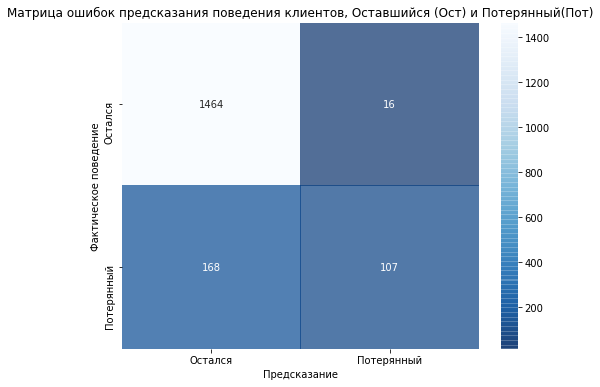

In [106]:
if (CB_yesnoswitch):
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r', 
                xticklabels=['Остался', 'Потерянный'],
                yticklabels=['Остался', 'Потерянный'], alpha=0.7)
    plt.ylabel('Фактическое поведение')
    plt.xlabel('Предсказание'); 
    plt.title('Матрица ошибок предсказания поведения клиентов, Оставшийся (Ост) и Потерянный(Пот)')
    plt.show()

Полученное из метрики ROC-AUC распределение кажется не очень оптимальным. Мы теряем 168 клиентов (из тестовой выборки в 1755 сохраняя 107 и 16 даем ошибочное предложение)

Попробуем "подкрутить" оценку вероятности чтобы добиться более качественных показателей, например не более 30% от выборки с ошибкой второго рода.

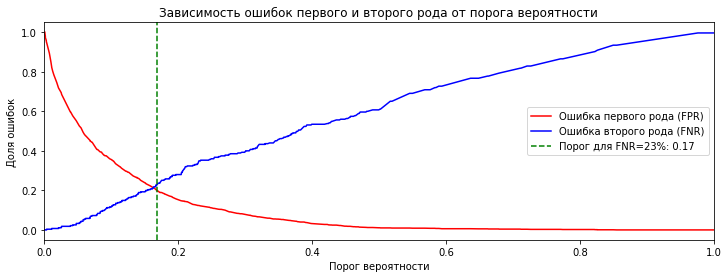

In [113]:
if (CB_yesnoswitch):
    #считаем TPR (True Positive Rate) и FPR (False Positive Rate) для разных порогов вероятности
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)

    #вычисляем FNR (False Negative Rate)
    fnr = 1 - tpr

    #ищем порог, при котором FNR близок к 30%
    target_fnr = 0.23
    closest_index = np.argmin(np.abs(fnr - target_fnr))
    threshold_at_target_fnr = thresholds[closest_index]

    #строим график график FPR и FNR в зависимости от порога вероятности
    plt.figure(figsize=(12, 4))
    plt.plot(thresholds, fpr, label='Ошибка первого рода (FPR)', color='red')
    plt.plot(thresholds, fnr, label='Ошибка второго рода (FNR)', color='blue')
    plt.axvline(x=threshold_at_target_fnr, color='green', linestyle='--', 
                label=f'Порог для FNR={target_fnr:.0%}: {threshold_at_target_fnr:.2f}')
    plt.xlabel('Порог вероятности')
    plt.ylabel('Доля ошибок')
    plt.title('Зависимость ошибок первого и второго рода от порога вероятности')
    plt.legend()
    plt.xlim([0, 1])
    plt.show()

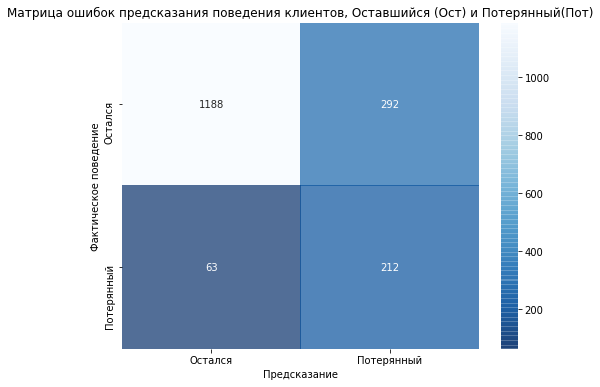

In [114]:
if (CB_yesnoswitch):
    # Преобразуем вероятности в классы с использованием найденного порога
    y_pred_class = (y_pred_proba_test >= threshold_at_target_fnr).astype(int)

    # Вычисляем confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_class)
    # отображаем график
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues_r', 
                xticklabels=['Остался', 'Потерянный'],
                yticklabels=['Остался', 'Потерянный'], alpha=0.7)
    plt.ylabel('Фактическое поведение')
    plt.xlabel('Предсказание'); 
    plt.title('Матрица ошибок предсказания поведения клиентов, Оставшийся (Ост) и Потерянный(Пот)')
    plt.show()


Мы все еще теряем 63 пользователей, зато "спасаем" 212. При этом правда, выдаем 292 дополнительных скидки тем пользователям которые не собирались от нас уходить.<br><br>Для заданного критерия выбра модели по ROC-AUC это похоже на куда как более хороший и приемлемый вариант.

## Вывод и рекомендации заказчику

### Общий вывод

В рамках задачи: <br><ul><i>
Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах. <b>Ваша задача — обучить на этих данных модель для прогноза оттока клиентов.</i></ul>
<br>Были проанализированы предоставленные данные и разработана и обучена модель, предсказывающая уход клиента с Accuracy=89.52 (ROC-AUC=87.66% , приведены показатели для тестовой выборки, на выборке для обучения ROC-AUC: 0.8512, Accuracy = 0.9183)<br><br>
Параметры модели: модель CatBoostClassifier, {'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.10802063476551074, 'subsample': 0.8343837553102058}
<br><br> У модели возможны улучшения, с предложениями можно ознакомиться в п.7.4. 
    

    




### Примечание по предоставленным данным

Предоставленные заказчиком данные достаточно "чистые", выбросов нет.<br> Данные содержат 7043 записей, 11 из которых содержат новых пользователей с двухлетними контрактами присоеденившихся в феврале 2020 года. Эти записи статистически не значимы и не имеют смысла при анализе данных ушедших клиентов поэтому перед анализом они были удалены.<br>Данные охватывают период за 5,5 лет - с середины 2014 до начала 2020 года. <br>Представленные признаки распределены в выборке относительно равномерно, выборка подходит для анализа без существенной обработки.<br>Распределения числовых переменных выглядит правдоподобно.<br>Целевой признак составляет около 15,6% в выборке.

### Найденные зависимости в данных

#### Общие характеристики

В данных содержится:
- 1520 пользователей с услугами только телефонии 
- 4832 с услугами телефонии и инетрента одновременно
- 680 пользователей кто пользуется только интернетом
<br>
</ul>
Самые популярные наборы услуг:
<ul>
- телефония (только телефония)
- интернет без каких либо дополнительных услуг 
- интернет с полным набором услуг
- сервисы цифрового телевидения 
</ul>
<br>В целом, можно говорить о высоком уровне продаж дополнительных сервисов - только 13% пользователей Интернета не подписаны на дополнительные сервисы (приведена оценка для пользователей Интернета, потому что у телефонии дополнительных сервисов нет).
<br><br>Также можно говорить о хороших показателях бизнеса в целом - LTV на клиента на настоящий момент более 2,1 тысячи долларов а отток клиентов не превышает 7% в год на протяжении последних трех лет и имеет тенденцию к снижению в относительных показателях (абсолютные показатели оттока клиентов растут, но их динамика роста ниже чем динамика роста клиентской базы) 

#### Выявленные харакетиристики для потерянных клиентов

Применимо к нашей задаче сокращения оттока клиентов, выявлено что вероятность ухода зависит:
- от продолжительности контракта - уход клиента ранее 10 месяцев после прихода в компанию маловероятен также как и уход клиента со сроком контракта более 55 месяцев
- от ежемесячных платажей - прямая корреляция с суммой платежей 
- от пола вероятность потери клиента не зависит
- признак пенсионера - влияет незначительно (14.8% и 20.3%). Шанс потерять пенсионера выше
- наличие супруга влияет значительно, если есть супруг, вероятность ухода в два раза больше
- наличие детей влияет совсем незначительно. Вероятности 14.9% и 17.5% в пользу детей. Видимо чем больше участников процесса, тем больше риск ухода, хотя дети имеют куда как меньшее влияние чем супруг/супруга
- безбумажный биллинг - вероятности ухода 13.3% и 17.3% в пользу безбумажного биллинга. Видимо более продвинутые клиенты легче меняют провайдера
- метод платежа - существенная разница по категориям. Максимальный отток по клиентам с автоматичесими оплатами (банковский платеж и кредитная карта, 20.6% и 20.8%) минимальный - электропочта, 7.3%

Идеальный потерянный клиент таким образом: пользовался услугами Интернета от 10 до 55 месяцев, имеет большие счета за услуги и пользуется большим набором услуг, и ежемесячные платежи выше среднего. Женат/замужем, пенсионер, и не любит когда с него списывают деньги автоматически.  

### Предложения по улучшению

#### В части применения модели  

Предложенная модель имеет воможности настройки пограничных значений для изменения баланса между ошибками первого и второго рода. С предлагаемыми сейчас настройками будет упущенно около трети клиентов из желающих уйти в переданной выборке, а скидка будет предложена в полтора раза большему количеству клиентов, чем собираось уходить. Т.е на одного "верно вычисленного" клиента у нас приходится 2 клиента, которых мы проинформируем ошибочно. И при этом треть клиентов из собирающихся уйти мы все равно потеряем.<br><br>Возможно выполнить боолее тонкую настройку модели, если будут известны предполагаемые затраты на клиента в целях его удержания (например в виде % снижения ежемесячного платежа) и стоимость привлечения нового клиента (как оценка стоимости потерянного клиента).

#### В части работы с пользователями и услуг

Выявленные закономерности, описанные в п. 7.3.2. указывают на характеристики клиентов, наиболее склонных к смене компании. Рекомендуется обратить особое внимание на удовлетворенность этих категорий клиентов, например, провести точечные опросы, показывающие степень удовлетворенности.
<br><br>Также предлагается сделать маркетинговый анализ (сравнение с конкурентами) пакетов предлагаемых услуг, так как выявлена повышенная вероятность оттока для пакетов включающих множество дополнительных услуг. Наиболее часто встречающиеся наборы сожно найти в п. 3.8.2.
<br><br>Кроме того, предлагается рассмотреть возможность создания многоступенчатой фильтрации и не предложения скидокклиентам отобранным моделью, а создания для них "группы риска", с дальнейшей дигностикой их на склонность к смене компании. 

## Архив

### RandomForestClassifier

Применим модель RandomForestClassifier к тестовой выборке. 

In [ ]:
if (RFC_yesnoswitch):

    #предсказания [0/1] на тестовой выборке
    y_pred_test = rfc_pipe.predict(X_test)

    #считаем Accuracy на тестовой выборке
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print('Accuracy на тестовой выборке:', accuracy_test)

    #вероятности принадлежности к положительному классу 
    y_pred_proba_test = rfc_pipe.predict_proba(X_test)[:, 1]  

    #вычисление ROC-AUC на тестовой выборке, по вероятностям
    roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)
    print('ROC AUC на тестовой выборке:', roc_auc_test)


Accuracy на тестовой выборке: 0.8593
<br>ROC AUC на тестовой выборке: 0.8353

### XGBClassifier

In [ ]:
if (XGB_yesnoswitch):
  
    #предсказания [0/1] на тестовой выборке
    y_pred_test = xgb_pipe.predict(X_test)

    #считаем Accuracy на тестовой выборке
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print('Accuracy на тестовой выборке:', accuracy_test)

    #вероятности принадлежности к положительному классу 
    y_pred_proba_test = xgb_pipe.predict_proba(X_test)[:, 1]  

    #вычисление ROC-AUC на тестовой выборке, по вероятностям
    roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)
    print('ROC AUC на тестовой выборке:', roc_auc_test)

Accuracy на тестовой выборке: 0.8660968660968661
ROC AUC на тестовой выборке: 0.8449864864864866

### DecisionTreeClassifier

In [ ]:
if (DTC_yesnoswitch):

    #предсказания [0/1] на тестовой выборке
    y_pred_test = dtc_pipe.predict(X_test)

    #считаем Accuracy на тестовой выборке
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print('Accuracy на тестовой выборке:', accuracy_test)

    #вероятности принадлежности к положительному классу 
    y_pred_proba_test = dtc_pipe.predict_proba(X_test)[:, 1]  

    #вычисление ROC-AUC на тестовой выборке, по вероятностям
    roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)
    print('ROC AUC на тестовой выборке:', roc_auc_test)

### Support Vector Machine - дополнительная попытка минимизации ошибки второго рода

In [ ]:
#переключатель запуска блока 6.4.
SVM_add_yesnoswitch = 0

In [ ]:
%%time

#функция для FNR
def fnr_score(y_true, y_pred):
    #True Positive Rate считаем recall
    tpr = recall_score(y_true, y_pred)
    #FNR = 1 - TPR
    return 1 - tpr

#создаем scorer из нашей функции
fnr_scorer = make_scorer(fnr_score, greater_is_better=False)

def objective(trial):
    #гиперпараметры для SVC
    C = trial.suggest_loguniform('C', 0.1, 100)  
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly'])
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
    tol = trial.suggest_float('tol', 1e-4, 1e-3)
    max_iter = trial.suggest_int('max_iter', 1000, 10000)

    #создаем модель SVC
    model = SVC(C=C, kernel=kernel, gamma=gamma, tol=tol, probability=True, max_iter=max_iter, random_state=RANDOM_STATE)

    #создаем пайплайн
    pipeline = Pipeline([
        ('preprocessor', data_preprocessor),
        ('model', model)
    ])

    #оцениваем модель
    score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=fnr_scorer).mean()
    return score

if (SVM_add_yesnoswitch):
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=100)

    print('Лучшие параметры:', study.best_params)
    print('Лучший FNR:', study.best_value)

    best_model = SVC(**study.best_params, random_state=RANDOM_STATE, probability=True)
    svc_pipe = Pipeline([
        ('preprocessor', data_preprocessor),
        ('model', best_model)
    ])
    svc_pipe.fit(X_train, y_train)

    y_pred_train = svc_pipe.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred_train)
    print('Accuracy на тренировочной выборке:', accuracy)


<pre>
Лучшие параметры: {'C': 0.8911178139638204, 'kernel': 'linear', 'gamma': 'auto', 'tol': 0.0008676952186910974, 'max_iter': 9242}
Лучший FNR: -1.0
Accuracy на тренировочной выборке: 0.8431149097815764
CPU times: user 15min 49s, sys: 611 ms, total: 15min 50s
Wall time: 15min 55s
</pre>

In [ ]:
if (SVM_add_yesnoswitch):

    #считаем предсказания [0/1] на тестовой выборке
    y_pred_test = svc_pipe.predict(X_test)

    #считаем Accuracy на тестовой выборке
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print('Accuracy на тестовой выборке:', accuracy_test)

    #получаем вероятности, для этого специально использовали при обучении параметр  probability=True
    #для ядер, которые поддерживают predict_proba (например, rbf), используем этот метод 
    if 'predict_proba' in dir(svc_pipe.named_steps['model']):
        y_pred_proba_test = svc_pipe.predict_proba(X_test)[:, 1]
    else:
        #для других ядер (например, linear) используем decision_function
        y_pred_proba_test = svc_pipe.decision_function(X_test)

    roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)
    print('ROC AUC на тестовой выборке:', roc_auc_test)

<pre>
Accuracy на тестовой выборке: 0.8433048433048433
ROC AUC на тестовой выборке: 0.7666584766584768
</pre>

In [ ]:
if (SVM_add_yesnoswitch):
    #считаем TPR (True Positive Rate) и FPR (False Positive Rate) для разных порогов вероятности
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)

    #вычисляем FNR (False Negative Rate)
    fnr = 1 - tpr

    #ищем порог, при котором FNR близок к 30%
    target_fnr = 0.3
    closest_index = np.argmin(np.abs(fnr - target_fnr))
    threshold_at_target_fnr = thresholds[closest_index]

    #строим график график FPR и FNR в зависимости от порога вероятности
    plt.figure(figsize=(12, 4))
    plt.plot(thresholds, fpr, label='Ошибка первого рода (FPR)', color='red')
    plt.plot(thresholds, fnr, label='Ошибка второго рода (FNR)', color='blue')
    plt.axvline(x=threshold_at_target_fnr, color='green', linestyle='--', 
                label=f'Порог для FNR={target_fnr:.0%}: {threshold_at_target_fnr:.2f}')
    plt.xlabel('Порог вероятности')
    plt.ylabel('Доля ошибок')
    plt.title('Зависимость ошибок первого и второго рода от порога вероятности')
    plt.legend()
    plt.xlim([0, 1])
    plt.show()
else:
    print ('Для отображения графика надо запустить блок поменяв переменную SVM_add_yesnoswitch = 1 в начале пункта 6.4')

In [ ]:
if (SVM_add_yesnoswitch):
    #преобразуем вероятности в классы с использованием найденного порога
    y_pred_class = (y_pred_proba_test >= threshold_at_target_fnr).astype(int)

    #вычисляем confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_class)

    # отображаем график
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues_r', 
                xticklabels=['Остался', 'Потерянный'],
                yticklabels=['Остался', 'Потерянный'], alpha=0.7)
    plt.ylabel('Фактическое поведение')
    plt.xlabel('Предсказание'); 
    plt.title('Матрица ошибок предсказания поведения клиентов, Оставшийся (Ост) и Потерянный(Пот)')
    plt.show()
else:
    print ('Для отображения графика надо запустить блок поменяв переменную SVM_add_yesnoswitch = 1 в начале пункта 6.4')

83 клиента с ошибкой второго рода против 496 с ошибкой первого и те-же 192 "спасенных" клиента.
<br><br>

**Вывод**: лучше не стало, оставляем как было